### LIBRARIES

In [54]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import normaltest

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import warnings

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import make_scorer, recall_score

# **Bank Marketing Campaign**

## **1. Business Understanding**

(Supervised Learning-Classification)

- **Context :**  

    Produk keuangan kini semakin beragam, investasi depostito menjadi salah satu produk keuangan yang paling dikenal masyarakat. Mekanismenya adalah pelanggan menyetorkan sejumlah uang ke bank atau lembaga keuangan dan hanya dapat menariknya setelah periode tertentu, dengan imbalan bunga tetap sesuai jumlah deposito. Bagi bank, keuntungan nasabah yang berinvestasi pada deposito antara lain:

    - Sumber dana stabil: deposito menjadi aliran dana yang stabil bagi bank, sehingga memudahkan perencanaan keuangan dan manajemen [likuiditas](https://www.ojk.go.id/id/kanal/perbankan/regulasi/peraturan-ojk/Documents/Pages/POJK-Nomor-18.POJK.03.2016/SAL%20-%20POJK%20Manajemen%20Risiko%20.pdf).

    - Biaya dana rendah: suku bunga deposito lebih rendah dari pembiayaan lainnya, sehingga dapat memberikan biaya dana yang lebih efisien.

    - Pendapatan lebih tinggi: bank dapat memanfaatkan dana deposito untuk pinjaman atau investasi dengan keuntungan yang lebih tinggi, sehingga menghasilkan keuntungan dari selisih bunga.

    - [Diversifikasi](https://www.ocbc.id/id/article/2021/07/12/diversifikasi-adalah) produk: menawarkan deposito yang menarik bagi berbagai jenis nasabah, serta memperluas produk yang tersedia dapat meningkatkan data tarik dari bank.

    - Maintain nasabah: deposito dengan suku bunga kompertitif dapat menarik nasabah baru dan meningkatkan loyalitas nasabah, sehingga mengurangi kemungkin nasabah berpindah bank. Ketika nasabah tidak berpindah ke bank lain, kestabilan pemasukan untuk bank semakin baik.

    Berdasarkan hal yang telah disebutkan diatas, investasi deposito menjadi program yang penting untuk bank. Namun, bank harus terus bersaing untuk mempertahankan dan menarik nasabah. Salah satu strategi efektif untuk mendapatkan nasabah baru adalah melalui marketing campaign melalui telemarketing.

- **Problem Statement :**

    Target dalam konteks ini adalah `deposit`, yang mencerminkan apakah nasabah berinvestasi atau tidak terhadap deposito yang ditawarkan setelah menerima campaign dari telemarketing. Untuk meningkatkan efisiensi dan efektivitas campaign tersebut, bank perlu memprediksi dan mengidentifikasi nasabah yang memiliki kemungkinan tinggi untuk berinvestasi pada deposito ketika ditawarkan campaign via telemarketing. 

- **Goals :**

    Dengan memanfaatkan profil nasabah dan data hasil campaign sebelumnya, bank bertujuan untuk memanfaatkan teknik machine learning untuk menilai probabilitas setiap nasabah yang berpotensi investasi dengan meningkatkan akurasi prediksi. Selain itu, bank ingin mengetahui profil atau faktor apa saja dari nasabah yang memiliki potensi investasi deposito, sehingga dapat membuat campaign yang lebih tepat sasaran.

- **Analytic Approach :**

    Akan dilakukan analisi data untuk menemukan pola yang membedakan nasabah potensial dan tidak, kemudian akan dibangun model klasifikasi yang dapat membantu bank untuk memprediksi probabilitas seorang nasabah yang berpotensial atau tidak.

- **Metric Evaluation :**

    Maka target yang ditetapkan adalah sebagai berikut: 

    - 0: Nasabah tidak potensial melakukan investasi deposito

    - 1: Nasabah potensial melakukan investasi deposito.

    Dari sisi kepentingan false positives dan false negatives dalam kontesk telemarketing untuk investasi deposito, maka didapatkan analisa sebagai berikut:

    1. Definisi Kerugian

        - False Positives: Calon nasabah tidak potensial investasi deposito tapi diprediksi sebagai calon potensial. Kerugian utamanya adalah biaya telemarketing yang dikeluarkan untuk calon nasabah yang tidak potensial.
    
        - False Negatives : Calon yang potensial berinvestasi namuan diprediksi sebagai calon yang tidak potensial. Kerugian utamanya adalah kehilangan potensi pemasukan dari calon nasabah yang sebenarnya potensial.

    2. Analisa Dampak Finansial:

        - False Positives, biaya Telemarketing, yang akan disimulasikan sebagai berikut:

            - [Aplikasi telemarketing](https://qontak.com/harga/) premium untuk 1 bulan adalah Rp.3.499.999 untuk 10.000 nomor aktif.

            - Seorang telemarketer dalam [sehari bisa melakukan panggilan hingga 130 orang](https://www.vice.com/id/article/10-pertanyaan-bikin-penasaran-buat-telemarketer-yang-gigih-menelepon-kita-siang-malam/), namun untuk mempermudah perhitungan anggap saja sehari 100 orang yang ditelpon, maka untuk memaksimalkan kuota aplikasi telemaketing (10.000 nomor aktif), maka dibutuhkan 100 orang telemarketer.

            - Jika [gaji seorang telemarketer](https://www.kitalulus.com/blog/seputar-kerja/tugas-dan-karir-telemarketing/) adalah Rp.3.500.000, maka dalam sebulan dibutuhkan dana Rp.350.000.000 untuk gaji telemarketer.

            - **Total pengeluaran biaya telemaketing** (aplikasi+gaji) adalah  Rp.353.499.000 untuk 10.000 nomor aktif nasabah atau **Rp.35.349,9/bulan untuk satu nasabah**.

        - False Negatives, kehilangan pemasukan dari calon nasabah yang sebenarnya potensial, yang akan disimulasikan sebagai berikut:

            - Mengacu pada [simulasi deposito](https://www.bca.co.id/id/Individu/produk/simpanan/Deposito-Berjangka), maka deposito minimal sesorang adalah Rp.8.000.000, yang jika disimpan selama satu tahun, maka nasabah akan mendapatkan Rp.8.128.000.

            - Dalam bisnis, bank akan memutar dana tersebut untuk mendapatkan keuntungan dari dana tersebut. Misal bank akan meminjamkan uang tersebut kepada nasabah peminjam, maka mengacu pada [simulasi pinjaman personal](https://www.bca.co.id/id/Individu/produk/pinjaman/Pinjaman-Personal), yang apabila akan dikembalikan dalam satu tahun, maka nasabah peminjam harus mengembalikan Rp.8.960.004.
            
            - Berdasarkan simulasi tersebut, maka diperkirakan **keuntungan minimum** bank dari **seorang nasabah yang berinvestasi deposito** adalah RP.832.004/tahun atau **RP.69.333/bulan untuk satu nasabah**.

    3. Efek Jangka Panjang:

        - False POsitives: akan terjadi pemborosan berulang dari telemarketing yang tidak efektif.

        - False Negatives: kehilangan peluang jangka panjang yang dapat mempengaruhi pertumbuhan dan reputasi perusahaan.

    4. Prioritas:

        - False Negatives: mengacu pada keuntungan yang didapatkan oleh bank (yang telah dipaparkan sebelumnya), maka false negatives cenderung lebih keritikal karena artinya bank akan kehilangan potensi pemasukan yang signifikan

        - False POsitives: pentingnya mengurangi atau menghindari pemborosan biaya, tapi dampaknya umumnya lebih rendah daibandingkan kerugian dari kehilangan calon potensial.

    5. Perbandingan Keuntungan dan Biaya berdasarkan simulasi pada point 2:

        - Keuntungan mendapatkan investasi deposito : RP.69.333/bulan untuk satu nasabah
        
        - Kerugian biaya telemarketing : Rp.35.349,9/bulan untuk satu nasabah

    6. Strategi:

        - Meningkatkan akurasi prediksi untuk mengurangi false positives dan false negatives.

        - Analisis biaya dan manfaat dengan cara evealuasi strategi telemarketig secara berkala.

        - Memberikan masukan kepada bank untuk meningkatkan data agar lebih akurat dan segmentasi yang tepat untuk meminimalkan kedua jenis kesalahan tersebut.

    7. Matrix Evaluasi yang pertimbangkan:

        - Recall : mengukur seberapa baik model dalam menangkap calon nasabah potensial untuk investasi deposito, dengan fokus pada mengurangi false negatives. Meskipun efektif untuk menangkap banyak calon potensial, namun matrix ini memiliki resiko terhadap false positives, yang dapat meningkatkan biaya telemarketing tanpa hasil yang diinginkan.

        - F1 Score : menyeimbangkan antara identifikasi calon yang benar-benat potensial dan menghindari melakukan telemarketing yang tidak efektif. Kelebihannya adalah kemampuan untuk menggabungkan keuntungan dari Recall dan Precision, sehingga mengurangi kedua jenis kesalahan. Namun matrix ini tidak dapat sepenuhnya menangani trade-off antara biaya yang terkait dengan false positives dan kehilangan potensi dari false negative.

    8. Kesimpulan:

        - Akan diprioritaskan untuk mengoptimalkan model dalam mendapatkan calon nasabah yang benar-benar potensial sekaligus meminimalkan biaya marketing, sehingga matrix yang akan digunakan adalah F1-Score.

- **Feature dan Hipotesa**

    - Customer profile:

        -	`age` : menunjukkan usia nasabah. Memahami usia nasabah dapat membantu penyesuaian pesan campaign deposito dengan preferensi nasabah. Misalnya, nasabah yang usianya lebih muda mungkin tertarik pada produk yang memiliki resiko dan keuntungan yang lebih tinggi, sementara nasabah yang lebih tua mungkin lebih memilih investasi yang stabil dan resiko rendah seperti deposito.

        -	`job` : menunjukkan jenis pekerjaan nasabah. Hal ini dapat memberikan gambaran tentang stabilitas financial dan kebiasaan menabung nasabah. Profesi dengan pekerjaan yang stabil mungkin cenderung berinvestai, namun akan dilakukan analisa lagi berdasarkan dataset.

        -	`balance`: menunjukkan saldo nasabah. Saldo yang lebih tinggi kenungkinan cenderung memiliki kapasitas finansial dan potensi untuk investasi.
        
        -	`housing`: menunjukkan kepemilikan rumah. Kepemilikan rumah biasanya juga mempengaruhi kebiasaan menabung dan potensi investasi nasabah.

        -	`loan`: informasi status nasabah pada pinjaman. Informasi ini dapat menunjukkan kewajiban potensial dan kemampuan nasabah untuk berinvestasi dalam deposito.

    - Marketing data:

        -	`contact` : Feature ini menunjukkan jenis komunikasi yang digunakan untuk menghubungi nasabah untuk mempengaruhi efektivitas campaign

        -	`month` : Feature ini merupakan bulan terakhir nasabah di hubungi, yang dapapat membantu identifikasi waktu optimal untuk melakukan kontak.

        -	`campaign` : Feature ini akan menunjukkan seberapa sering bank menghubungi klien. 

        -	`pdays` : Feature ini menunjukkan berapa hari telah berlalu sejak nasabah terakhir dihubungi dalam campaign sebelumnya. Interval yang lebih pendek mungkin menunjukkan ketertarikan, sementara interval yang lebih panjang mungkin menunjukkan waktu yang tepat untuk kembali terlibat.
        
        -	`poutcome` : Feature ini merupakan hasil dari campaign sebelumnya, yang dapat memberikan wawasan startegi yang berhasil atau tidak berhasil. Menganalisa feature ini dapat membantu campaign mendatang untuk meningkatkan efektivitas
                                                                        
        -	`deposit` : Merupakan status deposito nasabah, yang menjadi indikator utama keberhasilan campaign. 

## **2. Data Understanding**

### **Collection**

In [55]:
data=pd.read_csv('data_bank_marketing_campaign.csv')
print(f'Jumlah baris dan kolom {data.shape}')


Jumlah baris dan kolom (7813, 11)


In [56]:
#lima data awal
data.head(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [57]:
# lima data terakhir
data.tail(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


Interpretasi:

- Terdapat 7813 data dengan 11 kolom 

### **Initial Assesment**

In [58]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,age,int64,0.0,False,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0.0,False,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0.0,False,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0.0,False,2,"[no, yes]"
4,loan,object,0.0,False,2,"[no, yes]"
5,contact,object,0.0,False,3,"[cellular, telephone, unknown]"
6,month,object,0.0,False,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0.0,False,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0.0,False,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0.0,False,4,"[unknown, other, failure, success]"


Hal-hal yang perlu diperhatikan:
- `balance` : periksa kolom `balance` dengan value <0. nilai negatif mungkin menunjukkan nasabah memiliki hutang. 

- `contact` : periksa kolom `contact` dengan value 'unknown'. 

- `pdays` : periksa kolom `pdays` dengan value <0. Value -1 mungkin mengindikasikan bahwa nasabah tidak pernah dihubungi sebelumnya. 

- `poutcome` : periksa kolom poutcome dengan value 'unknown'. 

- periksa `pdays` dengan value <0 apakah ada keterhubungan dengan `poutcome` dengan value 'unknown'?

- `deposit` : variabel target, yang menunjukkan apakah nasabah melakukan deposito atau tidak. periksa proporsinya, untuk mengetahui balance atau tidak

### **Descriptive Statistics**

In [59]:
display(data.describe(), data.describe(include='object'))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


Interpretasi:

- Numerical

    - `age`: memiliki value dengan variasi yang besar antara 18-95 tahun. Sehingga perlu dipertimbangkan untuk melakukan pengelompokkan dalam data sehingga memudahkan model dalam menangani data yang mungkin tidak linear atau menangani outlier, lalu lakukan encoding.
    
    - `balance`: feature ini memiliki standar deviasi yang tinggi, sama seperti `age`, perlu dipertimbangkan untuk mengelompokkan data lalu encoding data.

    - `pdays`: feature ini memiliki nilai negatif, yang mungkin bisa menunjukkan missing value atau mengindindikasikan belum pernah di hubungi, sehingga perlu dipertimbangkan untuk handling missing value kolom tersebut atau membiarkannya sebagai sebuah kategori.

- Categorical:

    - `job`: ada 12 unique value, pertimbangkan untuk melakukan pengelompokkan data lalu encoding data.
    
    - `housing`: ubah sebagai biner yes=1, no=0 untuk mempermudah pemodelan.
    - `loan`: ubah sebagai biner yes=1, no=0 untuk mempermudah pemodelan.
    - `contact`: terdapat tiga unique value, maka pertimbangkan menggunakan one-hot encoding untuk feature ini.
    - `month`: ada 12 unique value, pertimbangkan untuk melakukan segmentasi/berdasarkan feature vs target lalu encoding.
    - `poutcome`: terdapat value 'unknown' yang harus dihandling, baik dengan handling missing value atau membiarkan sebagai kategori tersendiri. Pertimbangkan juga untuk tidak menggunakan feature ini karena dominasi valuenya 'unknown'.
    - `deposit`:  ubah sebagai biner yes=1, no=0 untuk mempermudah pemodelan.


## **3. Exploratory Data Analysis (EDA)**

### **Duplicates**

In [60]:
print(f"Jumlah duplikasi data: {data[data.duplicated()].shape}")
print(f'Persentase sebesar {len(data[data.duplicated()])/len(data)*100:.2f}%')

Jumlah duplikasi data: (8, 11)
Persentase sebesar 0.10%


Interpretasi:

- Didapatkan data duplikat sebesar 0.1% sehingga akan dilakukan handling duplikat dengan drop duplikat.

**Penanganan Data Duplikat**

In [61]:
# handling duplikat
data=data.drop_duplicates()

### **Missing Values**

In [62]:
# periksa value null pada dataset
pd.DataFrame({'null': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,null
age,0
job,0
balance,0
housing,0
loan,0
contact,0
month,0
campaign,0
pdays,0
poutcome,0


In [63]:
# periksa value unknown pada dataset
pd.DataFrame((((data=='unknown').sum()/data.notna().sum())*100).round(2), columns=['% Unknown'])

,% Unknown
age,0.00
job,0.69
balance,0.00
housing,0.00
loan,0.00
contact,20.96
month,0.00
campaign,0.00
pdays,0.00
poutcome,74.45


In [64]:
# periksa value negatif pada dataset
pd.DataFrame((((data.apply(pd.to_numeric, errors='coerce')<0).sum()/data.notna().sum())*100).round(2),columns=['Negative Count'])

,Negative Count
age,0.00
job,0.00
balance,6.14
housing,0.00
loan,0.00
contact,0.00
month,0.00
campaign,0.00
pdays,74.43
poutcome,0.00


**Analisa Feature-feature yang Terdapat 'unknown' dan negative**

In [65]:
# periksa proporsi pdays negatif dalam data
(data['pdays'].value_counts(normalize=True)*100).round(2).get(-1,0)

74.43

In [66]:
# periksa keterhubungan antara pdays negatif dengan poutcome
filter=data[data['pdays'] <0]
(filter['poutcome'].value_counts(normalize=True)*100).round(2)

poutcome
unknown    100.0
Name: proportion, dtype: float64

- Keterhubungan antara `pdays` negatif dengan `poutcome`: didapatkan bahwa untuk setiap baris dimana `pdays` bernilai negatif, 100% dari nilai `poutcome` adalah 'unknown'. Hal ini menunjukkan bahwa ketika `pdays` negatif (yang dicurigai sebagai tanda nasabah belum pernah di hubungi sebelumnya), informasi tentang `poutcome` tidak tersedia, yang artinya: jika nasabah belum pernah di hubungi, maka menjadi masuk akal jika blm ada hasil terhadap penawaran investasi deposito.

In [67]:
# periksa keterhubungan antara contact unknown dengan pdays, untuk mengetahui apakah contac
filter3=data[data['contact'] == 'unknown']
(filter3['pdays'].value_counts(normalize=True)*100).round(2).head(1)

pdays
-1    99.02
Name: proportion, dtype: float64

- Keterhubungan antara `contact` unknown dengan `pdays`: didapatkan bahwa untuk setiap baris dengan `contact` unknown, 99.02% data memiliki `pdays` yang bernilai negatif. Hal ini memperkuat bahwa `pdays` negatif memang diartikan sebagai nasabah yang belum pernah dihubungi sebelumnya, sehingga tidak tersedia data `contact` nasabah.

In [68]:
# periksa keterhubungan antara pdays negatif dengan contact	
filter=data[data['pdays'] == -1]
(filter['contact'].value_counts(normalize=True)*100).round(2)

contact
cellular     65.11
unknown      27.89
telephone     7.01
Name: proportion, dtype: float64

- Keterhubungan antara `pdays` negatif dengan `contact` : didapatkan bahwa untuk setiap baris dengan `pdays` negatif, 27.89% tidak memiliki informasi yang jelas sebagai `unknown`, namun didominasi dengan `contact` selullar dan adanya data `contact` telephone, padahal yang telah kita ketahui `pdays` negatif mengindikasikan belum pernah dihubungi sebelumnya. Hal ini dapat mengindikasikan bahwa adanya ketidakakuratan data pada `pdays` ataupun `contact`, sehingga bank harus menegaskan kepada telemarketer untuk mencatat dengan benar.

In [69]:
# periksa proporsi balance 0 dan  negatif dalam data
((data[data['balance']<=0].shape[0])/(data.shape[0]))*100

13.042921204356182

In [70]:
# periksa keterhubungan antara balance 0 dan negatif dengan hasil pada deposit
filter1=data[data['balance'] <= 0]
(filter1['deposit'].value_counts(normalize=True)*100).round(2)

deposit
no     66.01
yes    33.99
Name: proportion, dtype: float64

- Keterhubungan antara `balance` negatif dengan hasil deposit: nasabah dengan saldo <=0, 66.01% tidak berivestasi pada deposito, meskipun terdapat proporsi yang signifikan yang tetap berinvestasi pada deposito, yang artinya: terdapat feature lain yang mungkin dapat mempengaruhi keputusan nasabah berdeposito.

In [71]:
# periksa keterhubungan antara balance 0 dan negatif dengan hasil pada loan
filter2=data[data['balance'] <= 0]
(filter2['loan'].value_counts(normalize=True)*100).round(2)

loan
no     77.31
yes    22.69
Name: proportion, dtype: float64

- Keterhubungan antara `balance` <=0 dengan `loan`: didapatkan bahwa nasabah dengan `balance` <=0 lebih umum terkait dengan ketidakmampuan untuk mendapatkan pinjaman, walaupun ada juga nasabah yang memiliki hutang walaupun `balance` <=0. 



Interpretasi:

- data null : tidak ada missing value (null) dalam dataset

- data 'unknown' : kolom `job`, `contact`, dan `poutcome` mengandung nilai 'unkown' yang signifikan.

- data negative : kolom `balance` dan `pdays` mengandung nilai negatif. Pada `balance` terdapat nilai negatif, namun sepertinya bukan missing value melainkan bisa menjadi suatu informasi, namun pada `pdays`, nilai negatifnya bisa jadi indikasi missing value. 

- Berdasarkan analisa pada `pdays` dan `poutcome` didapatkan bahwa untuk `pdays` yang negatif maka tidak tersedia data pada `poutcome`. Dengan kata lain, jika nasabah belum pernah dihubungi, maka tidak ada hasil yang tercatat untuk penawaran investasi deposito.

- Berdasarkan analisa pada `pdays` dan `contact` didapatkan bahwa terdapat kemungkinan permasalahan ketersediaan dan konsistensi data terkait `contact`. Nasabah dengan `pdays` negatif yang berarti belum pernah dihubungi sebelumnya, tapi tersedia informasi `contact` nya. Padahal seharusnya jika nasabah belum pernah dihuubngi, maka `contact` akan berisi 'unknown'. Hal ini dapat mencerminkan ketidakkonsistenan data, yang mungkin dapat mempengaruhi analisa dan keputusan dari modeling.

- Berdasarkan analisa pada `balance` didapatkan bahwa nasabah dengan `balance` <=0 menunjukkan kecendrungan untuk menolak tawaran deposit, yang mungkin mencerminkan ketidakmampuan nasabah terhadap tambahan beban financial dalam kondisi keuangan yang sudah buruk. Di sisi lain, meskipun `balance` <=0 dapat mengindikasikan kesulitan keuangan, dari data dapat diindikasikan bahwa nasabah juga sulit untuk mendapatkan pinjaman (dilihat dari `loan` no). Sehingga Bank perlu mempertimbangkan kondisi keuangan pelanggan dalam strategi pemasaran. Untuk nasabah dengan `balance` <=0, mungkin dapat dipertimbangkan untuk menarwarkan produk yang lebih sesuai dengan kemampuan mereka, atau memperhatikan feature lainnya sehingga dapat mempertimbangkan mereka sebagai nasabah yang potensial.

- Alasan mengapa kolom `poutcome` dan `pdays` missing value ('unknown') tinggi **dipertimbangkan untuk tidak dijadikan feature**:

    1. Kualitas data terbatas: dengan hampir 75% missing value, kolom `pdays` dan `poutcome` menyumbangkan informasi yang sangat terbatas untuk analisis. Hal tersebut dapat mengurangi kualitas data dan membuat informasi dalam kolom tersebut kurang informatif. 

    2. Meningkatkan kompleksitas model: jika kolom `pdays` dan `poutcome` akan di imputasi, maka bisa jadi tidak memberikan hasil yang akurat serta kompleksitas model makin tinggi dan belum tentu memberikan model yang baik. Hal ini juga dapat menyebabkan overvitting, dimana model akan berusaha untuk belajar dari data yang tidak representatif.

    3. Efisiensi analisis: mengabaikan kolom `pdays` dan `poutcome` dapat menyederhanakan dimensi yang mungkin dapat membuat analisis lebih efisien dan lebih mudah dikelola. Seliain itu, kita bisa lebih fokus menganalisa pada fitur yang lebih informatif dan relevan.

    4. Jika dilihat dari keterhubungan missingvalue, maka `pdays` dengan value <0 hanya berelasi pada `poutcome` dengan value 'unknown', hal tersebut menunjukkan adanya keterhubungan. Sehingga jika salah satu kolom tersebut tidak diikutsertakan, maka satu kolom lainnya juga.

    5. Namun, akan tetap dilakukan explorasi data untuk lebih mendapatkan informasi mengenai kedua kolom tersebut.


- Alasan mengapa `contact` dengan missing value ('unknown') 20.96% tetap dijadikan feature:

    1. Berdasarkan [jenis telemarketing](https://mitracomm.com/telemarketing-adalah/), telemarketing memang melakukan contact via 'cellular' ataupun 'phone', namun kolom ini saya rasa memiliki relevansi yang penting untuk menganalisa hasil campaign.


### **Numerical Features**

#### **Data Distribution**

In [72]:
numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

In [73]:
dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,age,819.059254,1.391691e-178,Not Normally Distributed
1,balance,9799.383492,0.000000e+00,Not Normally Distributed
2,campaign,8669.137504,0.000000e+00,Not Normally Distributed
3,pdays,3877.270153,0.000000e+00,Not Normally Distributed


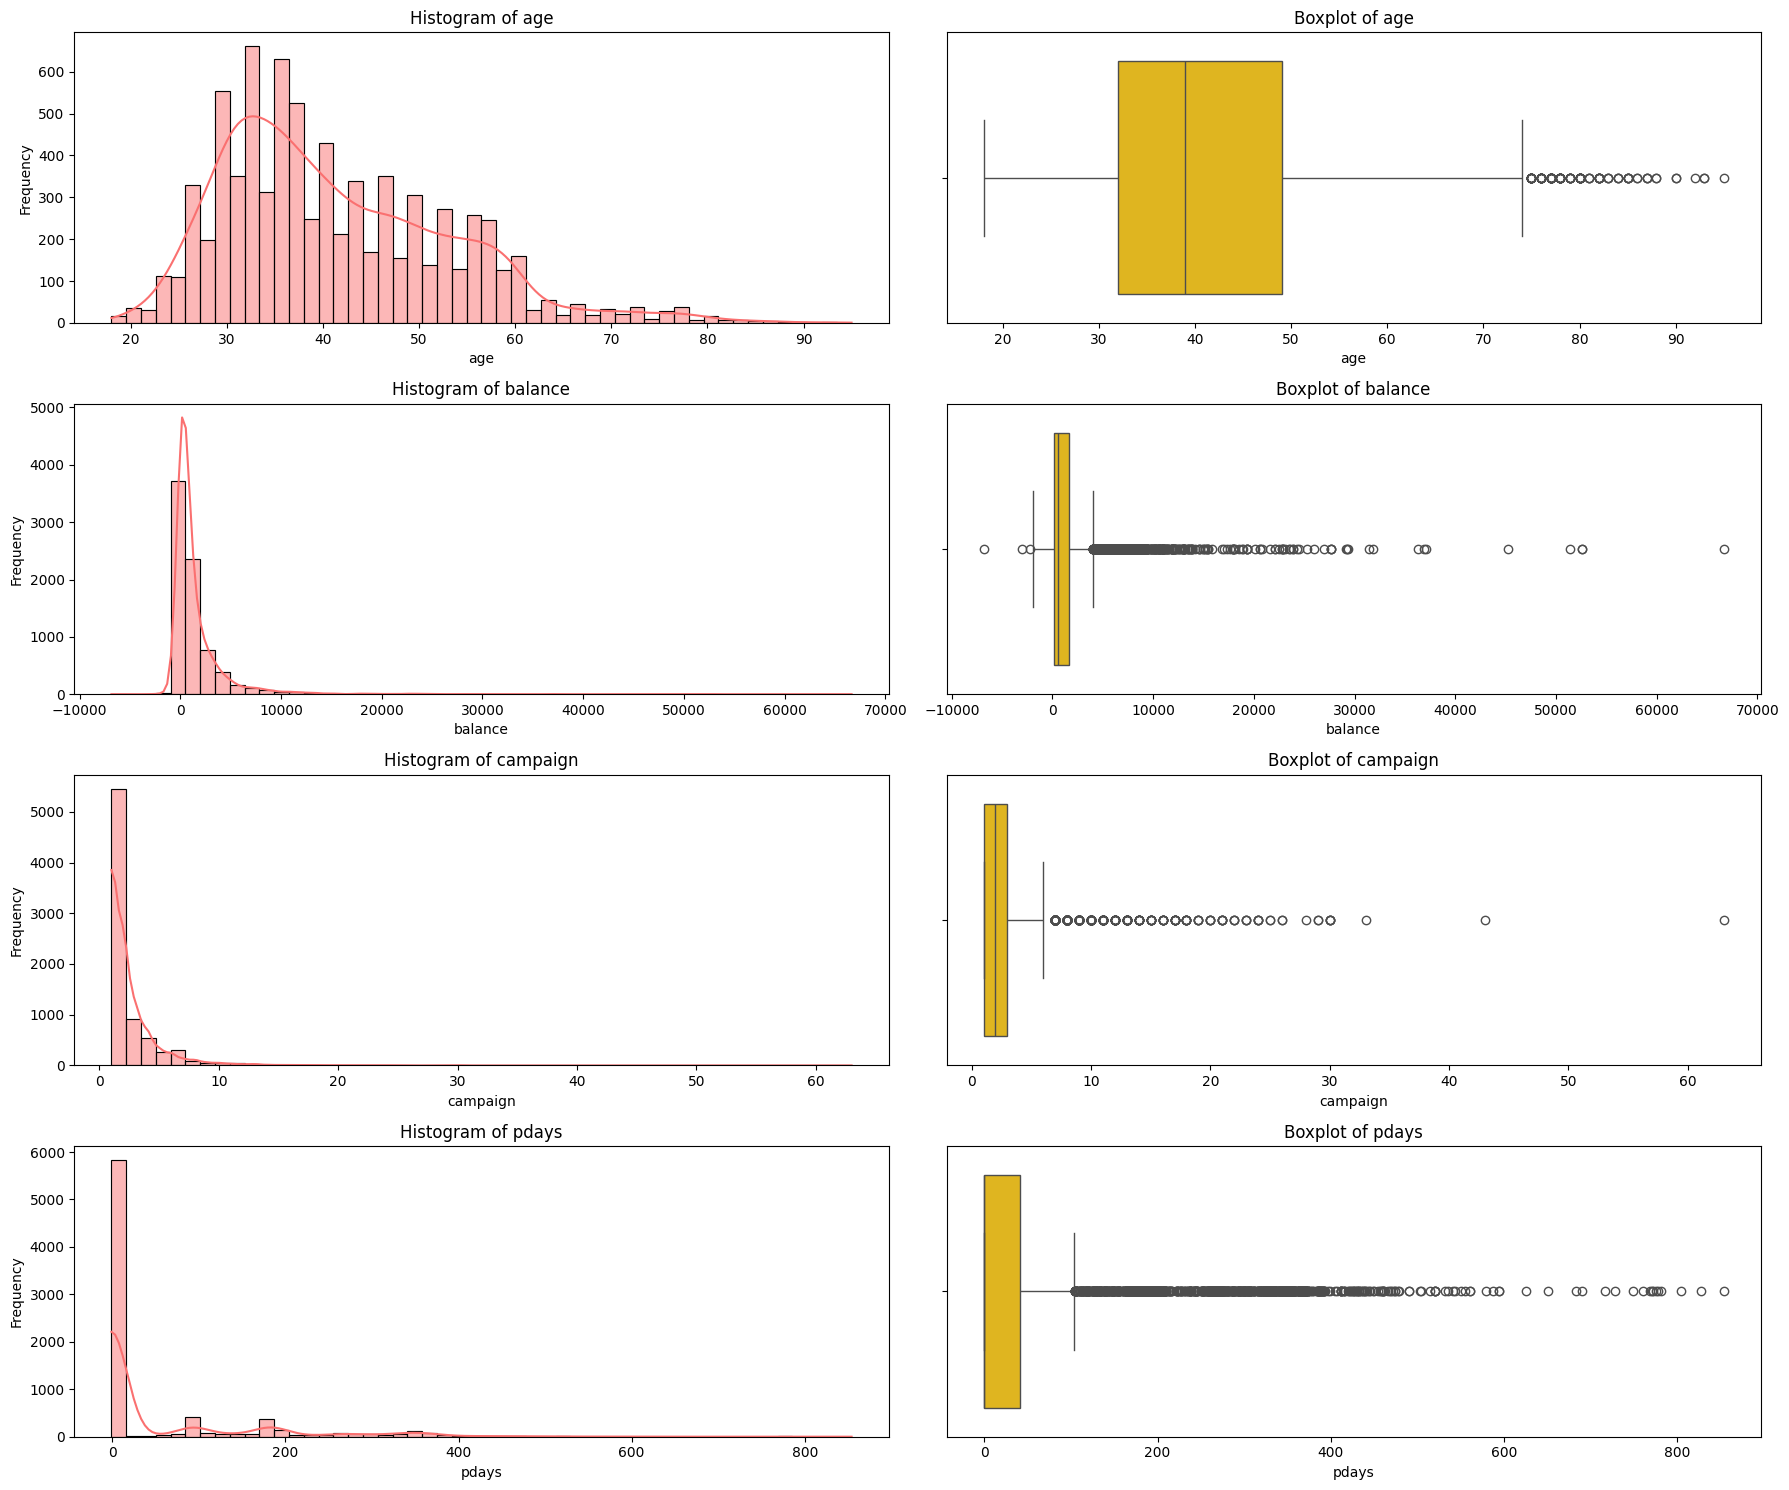

In [75]:
# visualisasi data distribution
plt.figure(figsize=(18, 15))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Interpretasi:

- Feature `age`, `balance`, `campaign`, dan `pdays` berdasarkan hasil uji D'Agostino-Pearson tidak terdistribusi normal. P-value yang sangat kecil dapat mengindikasikan adanya skewness atau outliers yang signifikan pada masing-masing kolom yang dapat dilihat pada visualisasi diatas.

- Berdasarkan grafik yang ada, didapatkan bahwa:
>
| Feature   | Skewness        | Analisa |
|-----------|-----------------|---------|
| `age`     | Positive Skew   | Sebagian besar nasabah berusia muda dan terdapat nasabah berusia dengan nilai ekstrim yang tinggi |
| `balance` | Positive Skew   | Banyak saldo yang rendah dan beberapa nilai saldo sangat tinggi, yang menunjukkan distribusinya tidak merata |
| `campaign`| Positive Skew   | Mayoritas nasabah mendapatkan campaign yang sedikit, namun terdapat beberapa nasabah dengan jumlah campaign yang tinggi |
| `pdays`   | Positive Skew   | Banyak nilai yang rendah, yang menunjukkan bahwa nasabah mungkin belum pernah dihubungi, namun terdapat nasabah yang yang baru dihubungi |



#### **Correlation**

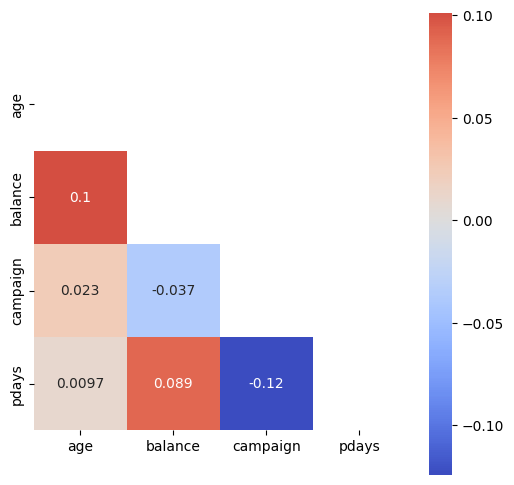

In [76]:
plt.figure(figsize=(6, 6))

matrix = np.triu(data.corr(method='spearman', numeric_only=True))

sns.heatmap(data=data.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

Interpretasi:

- Secara umum, korelasi antara kolom `age`, `balance`, `campaign`, dan `pdays` sangat lemah, dengan nilai-nilai mendekati nol dan sedikit negatif ataupun positif. Hal ini dapat menunjukkan bahwa tidak terdapat hubungan kuat antara variabel yang akan diuji.

- Model perlu memperhitungkan kemungkinan bahwa variabel-variabel ini tidak bekerja secara independen atau memiliki korelasi yang lebih kompleks yang tidak dapat tercermin hanya dari korelasi sederhana.

#### **Feature vs Target**

In [77]:
numerical

['age', 'balance', 'campaign', 'pdays']

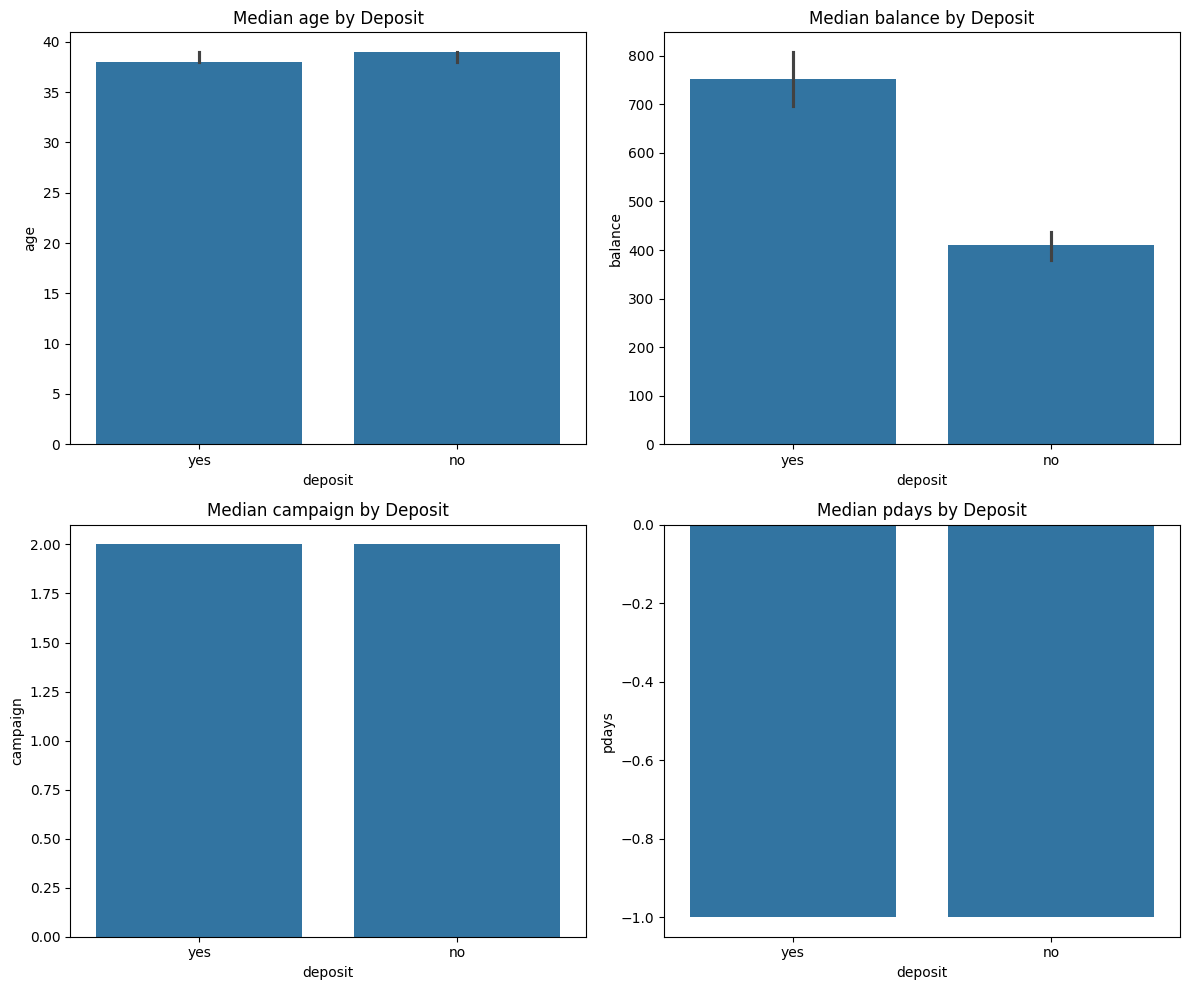

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for col, ax in zip(numerical, axes.flatten()):
    sns.barplot(data=data, y= col, x='deposit', estimator=np.median, ax= ax, )
    ax.set_title(f'Median {col} by Deposit') 

plt.tight_layout()
plt.show()

| Feature | Interpretasi |
|--------------------------------|----------------------------------------------------------------------|
| `age` | perbedaan median usia nasabah dengan `deposit` 'yes' dan 'no' sangat kecil, yang dapat menunjukkan bahwa usia tidak menjadi faktor penentu utama. Mengingat banyaknya nilai unik pada feature ini, maka akan dilakukan segmentasi `age` berdasarkan sumber yang ada |
| `balance` | nasabah dengan `deposit` 'yes' memiliki saldo yang lebih tinggi, yang dapat menunjuukan kemampuan finansial yang lebih besar untuk bisa berinvestasi dalam deposito |
| `campaign` | median jumlah campaign tidak menunjukkan perbedaan antara nasabah dengan `deposit` 'yes' ataupun 'no', yang dapat menunjukkan bahwa frekuensi kontak tidak mempengaruhi keputusan pada investasi deposito |
| `pdays` | median pdays menunjukkan nilai negatif yang sama pada `deposit` 'yes' ataupun 'no', yang mungkin menunjukkan bahwa `pdays` tidak dapat memerikan informasi tambahan mengenai keputusan pada investasi deposito |

##### **Segmentasi Feature `age`**

- Feature `age` memiliki 75 nilai unik dari 18-95 tahun, maka akan dilakukan segmentasi umur yang mewakili nilai pada feature ini, yang akan dituangkan pada feature `cat_age`.

- Berdasarkan [age categories](https://pubmed.ncbi.nlm.nih.gov/32025368/), didapatkan bahwa:

    | Range      | Categories    |
    |------------|---------------|
    | 18-25      | Young         |
    | 26-44      | Adults        |
    | 45-59      | Middle-Age    |
    | 60-above   | Old           |


In [79]:
age_cat=[]
for age in data['age']:
    if age <=25:
        cat='Young'
    elif age <=44:
        cat='Adults'
    elif age <=59:
        cat='Middle-Age'
    else:
        cat='Old'
    age_cat.append(cat)
data['cat_age']=age_cat
data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,Middle-Age
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Adults
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,Middle-Age
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Adults
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Adults


In [80]:
data['cat_age'].value_counts()

cat_age
Adults        4791
Middle-Age    2153
Old            554
Young          307
Name: count, dtype: int64

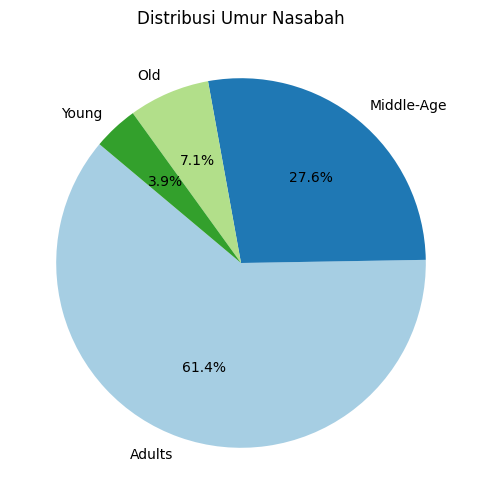

In [81]:
age_counts = data['cat_age'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(age_counts))))
plt.title('Distribusi Umur Nasabah')
plt.show()

Interpretasi:

- Fokus Pemasaran: Prioritaskan pemasaran kepada kelompok "Adults" yang merupakan segmen terbesar dan kemungkinan memiliki kapasitas finansial yang baik untuk investasi deposito.

- Penyesuaian Strategi: Pertimbangkan penawaran khusus atau produk yang sesuai untuk "Middle-Age" dan "Old" untuk memaksimalkan konversi.

- Pendekatan kepada "Young": Meskipun kelompok ini kecil, strategi edukasi dan penawaran khusus dapat membangun kebiasaan investasi jangka panjang dan memperluas basis nasabah di masa depan.

##### **Analisa Tambahan Feature `balance`**

In [82]:
data['balance'].min(), data['balance'].max() 

(-6847, 66653)

In [83]:
data['balance'].value_counts().sum()

7805

In [84]:
data[(data['balance']==0) & (data['deposit']==1)].value_counts().sum()

0

In [85]:
data[(data['balance']<0) & (data['deposit']==1)].value_counts().sum()

0

Interpretasi :

- Terdapat 346 (4.35%) data dengan `balance` dibawah atau sama dengan 0 dengan pekerjaan yang beragam, namun berinvestasi pada desposito. 

- Berdasarkan data, timbul kecurigaan pada  ['balance']<0 namun data['deposit']=1, hal ini biasanya cenderung tidak terjadi dan tidak masuk akal, sehingga akan dicoba filter data tanpa kategori tersebut dalam pemodelan dan akan dibandingkan hasilnya.

- Dalam perbankan dan investasi, sangat penting bagi bank untuk bijaksana pada nasabah yang memiliki `balance` negatif (kesulitan financial). Menerima nasabah dengan kondisi tersebut untuk berdeposito dapat menimbulkan resiko serius bagi bank, yang dapat berdampak negatif pada keuangan dan reputasi Bank. Potensi kerugian utama meliputi gangguan likuiditas akibat penarikan depostio dini oleh nasabah yang mengalami kesulitan finansial, serta biaya administrasi yang lebih tinggi untuk menangani nasabah-nasabah dengan kondisi demikian. 

- Perubahan ekonomi dan fluktuasi suku bunga juga dapat mempengaruhi kemampuan nasabah untuk membayar hutang dan berivestasi, yang artinya dapat menambah resiko bagi Bank. Oleh karena itu bank perlu melakukan evaluasi menyeluruh terhadap kemampuan nasabah membayar hutang dan menimbang kemampuan nasabah jika ingin melakukan investasi deposito untuk menghindari dampak negatif yang mungkin akan timbul.


### **Categorical Features**

#### **Distribution**

In [86]:
categorical = [var for var in data.columns if data[var].dtypes in ['object']]

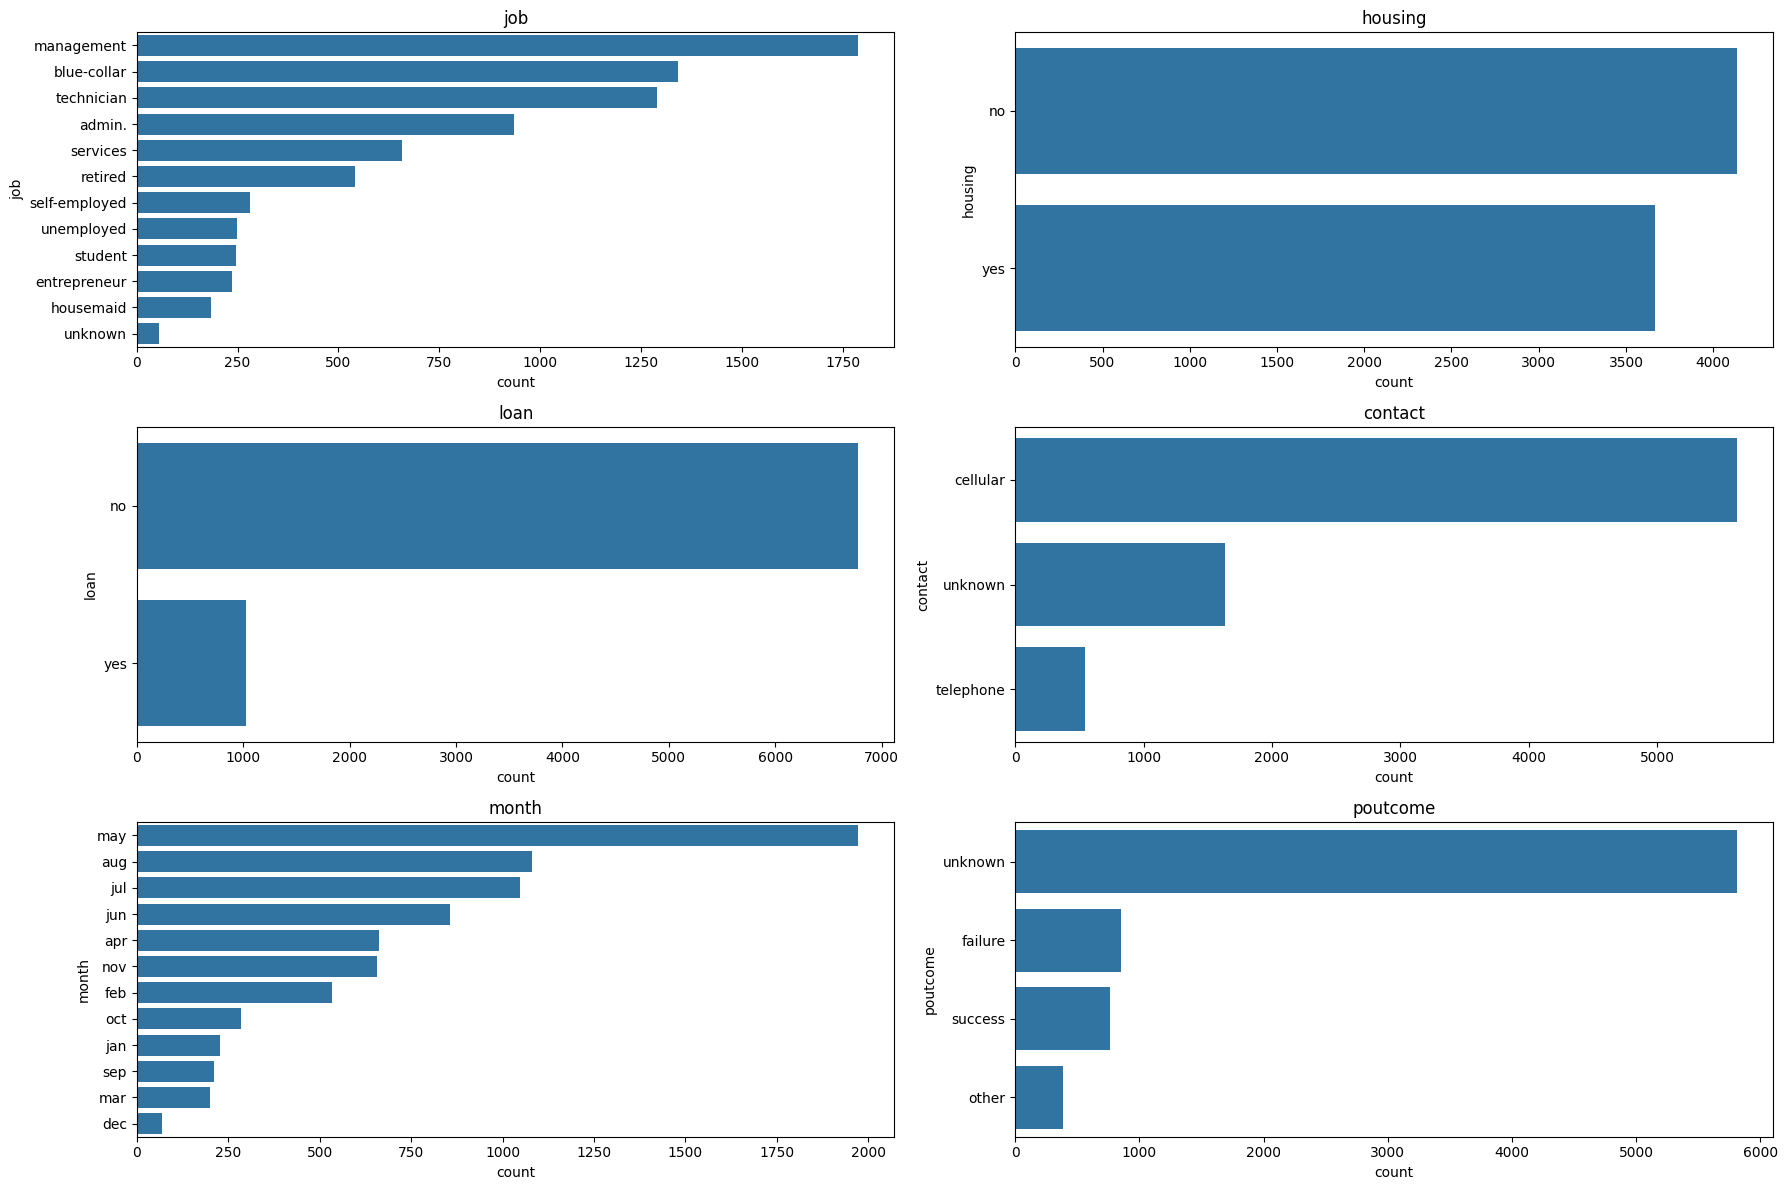

In [87]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index)
    ax.set_title(f'{i}', size = 12) 

plt.tight_layout()
plt.show()

| Feature | Interpretasi |
|--------------------------------|----------------------------------------------------------------------|
| `job` | pekerjaan yang paling umum adalah 'manajemen', sedangkan yang paling sedikit adalah 'housemaid'. Terdapat 'unknown' pada `job` yang harus diperhatikan |
| `housing` dan `loan`| sebagian besar nasabah memiliki kredit perumahan namun tidak memiliki hutang pribadi |
| `contact` | metode yang paling ummum digunakan adalah telepon celuller. Terdapat 'unknown' pada `contact` yang harus diperhatikan |
| `month` | frekuensi campaign berbeda-beda setiap bulannya, namun Mei merupakan bulan dengan frekuensi tertinggi, sedangkan Desember adalah yang terendah |
| `poutcome` | hasil campaign 'unkonwn' merupakan yang paling banyak pada `putcome`, hal ini perlu diperhatikan dan dipertimbangkan apakah kolom ini akan dipakai atau tidak? Mengingat 'unkown' terlalu mendominasi kolom ini |

#### **Feature vs Target**

In [88]:
def create_plot(data, col, x_maks=1000):

    agg_table = data.groupby([col, 'deposit']).size().unstack().reset_index()
    agg_table['total'] = agg_table['yes']+agg_table['no']
    agg_table['% deposit'] = (agg_table['yes']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% deposit', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% deposit', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of deposit passengers by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='deposit', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of customer by {col} and deposit')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()

##### **Feature `job`**

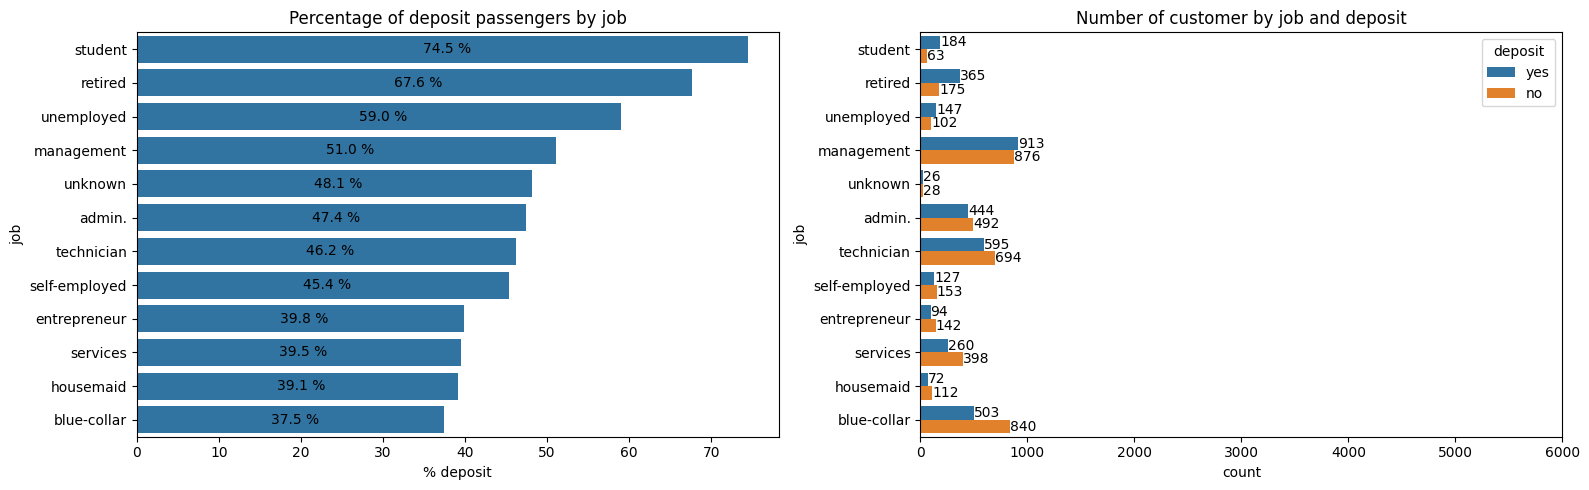

In [89]:
create_plot(data, 'job', x_maks=6000)

Interpretasi:

- Berdasarkan % deposito tertinggi, kategori 'student' dan 'retired' memiliki prosentase tertinggi pada data, yang dapat menunjukkan bahwa kategori tersebut cenderung melakukan deposito. Sedangkan untuk blue-collar memiliki prosentase deposito terendah, yang menunjukkan bahwa nasabah pada kategori ini kurang cenderung melakukan deposito.

- Berdasarkan jumlah nasabah, kategori 'management', 'technician', 'blue-collar', 'admin', dan 'service' menunjukkan jumlah yang signifikan pada deposit 'yes', sehingga bank dapat mempertimbangkan kategori tersebut sebagai target potensial untuk campaign deposito.

- Berdasarkan distribusi `job` terhadap `deposit` terlihat bahwa sebaiknya dilakukan pengelompokkan data. Namun, tidak bijak jika melakukan pengelompokkan data berdasarkan segmentasi jenis penghasilan ataupun blue-collar/white-collar. Sehingga dilakukan pengelompokkan data menggunakan Clustering dengan feature '% deposit' dan 'jumlah nasabah', dengan jumlah cluster ditentukan berdasarkan elbow/ silhouette score. Dengan demikian, akan didapatkan kategori berdasarkan kecenderungan untuk deposito dan ukuran populasi dalam tiap kategori. 

**Clustering `job`**

- Feature `job` memiliki 12 nilai unik, berdasarkan hasil feature vs target, segmentasi `job` kurang tepat jika menggunakan domain knowledge, sehingga dilakukan clustering berdasrakan dua feature dalam feature vs target, yaitu berdasarkan total nasabah pada setiap kategorinya dan % keberhasilan investasi deposit pada setiap kategori (deposit='yes'). Hal ini disebabkan oleh pentingnya kedua parameter tersebut dalam menentukan kategori yang potensial, yang dapat mengidentifikasi kelompok dari kategori dengan potensi terbaik.

In [90]:
# agg_table_job

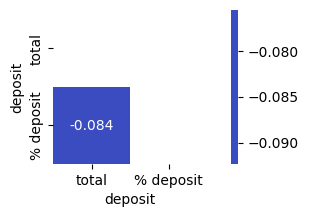

In [91]:
agg_table_job = data.groupby(['job', 'deposit']).size().unstack().reset_index()
agg_table_job['total'] = agg_table_job['yes']+agg_table_job['no']
agg_table_job['% deposit'] = (agg_table_job['yes']/agg_table_job['total']*100).round(2)
agg_table_job = agg_table_job.sort_values(by='% deposit', ascending=False)
agg_table_job

# (agg_table_job[['total','% deposit']].corr(method='spearman', numeric_only=True))
plt.figure(figsize=(6, 2))

matrix = np.triu(agg_table_job[['total','% deposit']].corr(method='spearman', numeric_only=True))
sns.heatmap(data=agg_table_job[['total','% deposit']].corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

- Korelasi antara total dan % deposit sangat lemah, artinya tidak ada pola atau hubungan signifikan antara keduanya. 

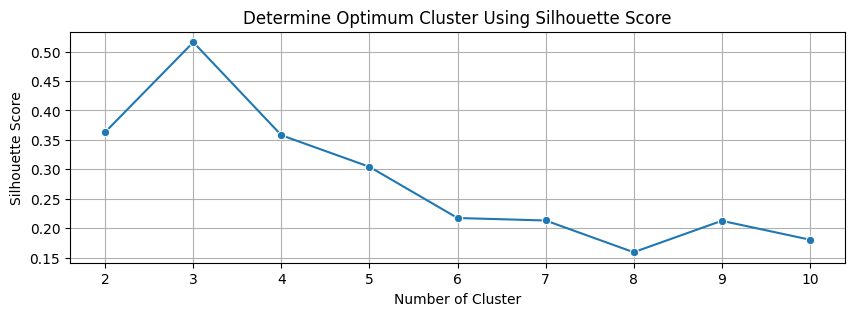

In [92]:
# K-MEANS dengan Silhouette Score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# define feature
X = agg_table_job[['total','% deposit']]

# define scaler
scaler = StandardScaler()

# fitting scaler to data
scaler.fit(X)

# transform
X_scaled = scaler.transform(X)

from sklearn.metrics import silhouette_score
number_of_clusters = range(2, 11)
score = []
for k in number_of_clusters:

    # define kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

    # fitting
    kmeans.fit(X_scaled)

    # labels
    label = kmeans.labels_

    # evaluate
    sil_score = silhouette_score(X_scaled, labels=label, metric='euclidean')
    score.append(sil_score)
    # print(sil_score)
plt.figure(figsize=(10,3))
sns.lineplot(y=score, x=number_of_clusters, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Determine Optimum Cluster Using Silhouette Score')
plt.grid()
plt.show()

In [93]:
# Agglomerative dengan Silhouette Score

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

number_of_clusters = range(2,11)
methods=['ward', 'complete', 'average']

linkage=[]
n_cluster= []
sil_score=[]

for method in methods:
    for k in number_of_clusters:
        # define model
        model= AgglomerativeClustering(linkage=method, n_clusters=k)
        # fit and predict
        labels=model.fit_predict(X_scaled)
        # evaluate
        score=silhouette_score(X_scaled, labels, random_state=0)
        # store to the list
        linkage.append(method)
        n_cluster.append(k)
        sil_score.append(score)
df_score=pd.DataFrame({
    'method': linkage,
    'cluster': n_cluster,
    'silhouette': sil_score
})
df_score.sort_values('silhouette',ascending=False)



,method,cluster,silhouette
19,average,3,0.515908
1,ward,3,0.515908
10,complete,3,0.471197
2,ward,4,0.429367
20,average,4,0.429367
18,average,2,0.415861
0,ward,2,0.415861
11,complete,4,0.389520
9,complete,2,0.363396
21,average,5,0.302019


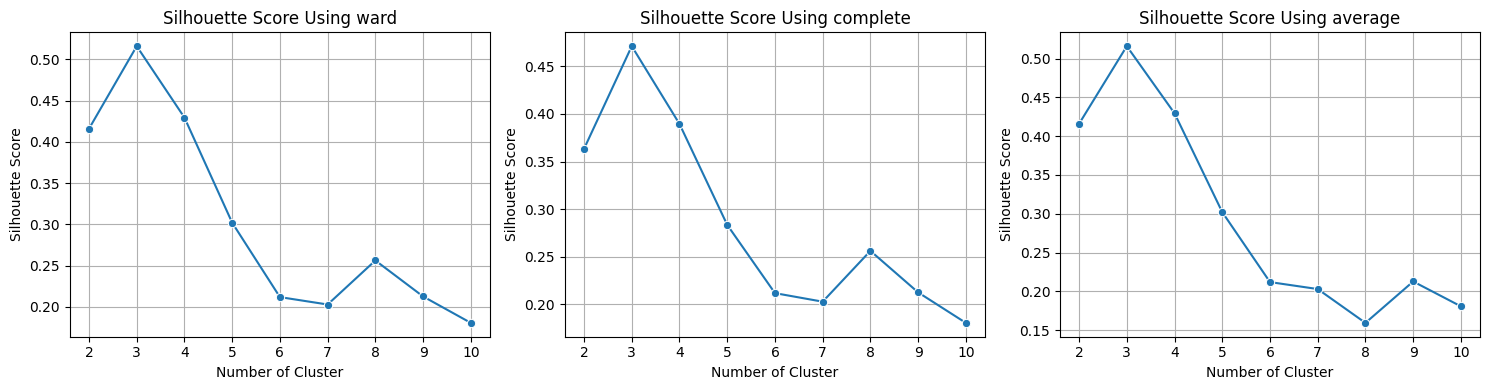

In [94]:
plt.figure(figsize=(15,4))
plot=1

for method in methods:
    plt.subplot(1,3,plot)
    sns.lineplot(data=df_score[df_score['method']==method], x='cluster', y='silhouette', marker='o')
    plt.title(f'Silhouette Score Using {method}')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Silhouette Score')
    plot+=1
    plt.grid()
plt.tight_layout()
plt.show()

Interpretasi :
- Berdasarkan perhitungan clustering K-means baik dengan Silhouette Score serta clustering Agglomerative dengan Silhouette Score, didapatkan bahwa cluster terbaik adalah tiga. Sehingga akan dilakukan segmentasi feature `job` dalam tiga cluster.
- Nilai Silhouette Score untuk setiap metode clustering: 
    - k-means : 0.515908
    - average :	0.515908
    - ward    : 0.515908
    - complete:	0.471197

- Akan dilakukan clustering dengan Agglomerative-ward, karena tidak dipengaruhi oleh nilai random dan Silhouette Score nya tinggi.

In [95]:
# define final model
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_labels = ward.fit_predict(X_scaled)
# agg_table_job[['total','% deposit']]
agg_table_job['ward'] = ward_labels
agg_table_job.sort_values('ward')

deposit,job,no,yes,total,% deposit,ward
4,management,876,913,1789,51.03,0
0,admin.,492,444,936,47.44,0
9,technician,694,595,1289,46.16,0
1,blue-collar,840,503,1343,37.45,0
8,student,63,184,247,74.49,1
5,retired,175,365,540,67.59,1
10,unemployed,102,147,249,59.04,1
11,unknown,28,26,54,48.15,2
6,self-employed,153,127,280,45.36,2
2,entrepreneur,142,94,236,39.83,2


Interpretasi:

- Ward 0 : 'management', 'admin.', 'technician', dan 'blue-collar'. Cluster ini cenderung memiliki prosentasi deposit antara 37-51% (moderat) dengan total nasabah yang tinggi. 

- Ward 1 : 'student', 'retired', dan 'unemployed'. Cluster ini cenderung memiliki prosentasi deposit antara 59-74% (tinggi) dengan total nasabah lebih rendah.
- Ward 2 : 'unknown', 'self-employed entrepreneur', 'services', dan 'housemaid'. Cluster ini cenderung memiliki variasi signifikan pada prosentase deposit dan total nasabah.

In [96]:
data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,Middle-Age
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Adults
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,Middle-Age
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Adults
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Adults


In [97]:
ward0=['management', 'admin.', 'technician', 'blue-collar']
ward1=['student', 'retired','unemployed']
ward2=['unknown', 'self-employed', 'entrepreneur', 'services', 'housemaid']

def cate_job(job):
    if job in ward0:
        return 'job1'
    elif job in ward1:
        return 'job2'
    elif job in ward2:
        return 'job3'
    else:
        return 'unknown'

data['cat_job']=data['job'].apply(cate_job)

data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age,cat_job
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,Middle-Age,job1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,Adults,job3
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,Middle-Age,job1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,Adults,job3
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,Adults,job3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes,Old,job3
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes,Middle-Age,job3
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no,Adults,job3
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no,Adults,job1


In [98]:
data['cat_job'].value_counts()

cat_job
job1    5357
job3    1412
job2    1036
Name: count, dtype: int64

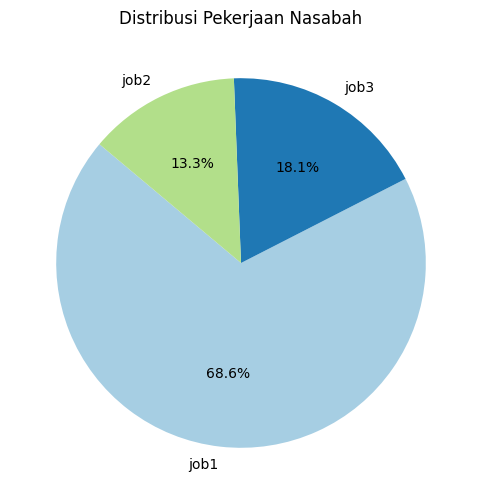

In [99]:
job_counts = data['cat_job'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(job_counts))))
plt.title('Distribusi Pekerjaan Nasabah')
plt.show()

##### **Feature `housing`**

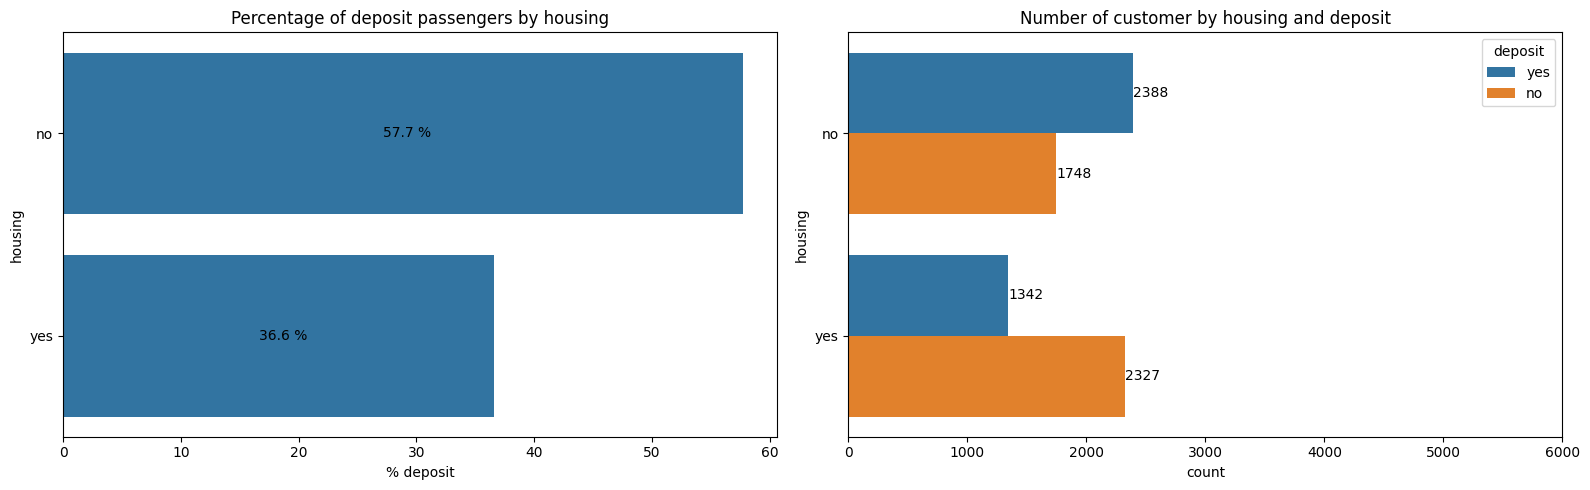

In [ ]:
create_plot(data, 'housing', x_maks=6000)

Interpretasi:

- Nasabah yang tidak memiliki rumah memiliki prosentase deposit serta total nasabah yang lebih tinggi cenderung menggunakan deposito  dibandingkan nasabah yang memiliki rumah. Hal ini dapat menunjukkan bahwa nasabah yang tidak memiliki rumah, mungkin memiliki dana yang lebih karena tidak melakukan investasi pada rumah, sehingga memilih investasi pada deposito.

- Nasabah yang memiliki rumah juga ada yang berinvestasi pada deposito, dengan jumlah yang cukup signifikan.

##### **Feature `loan`**

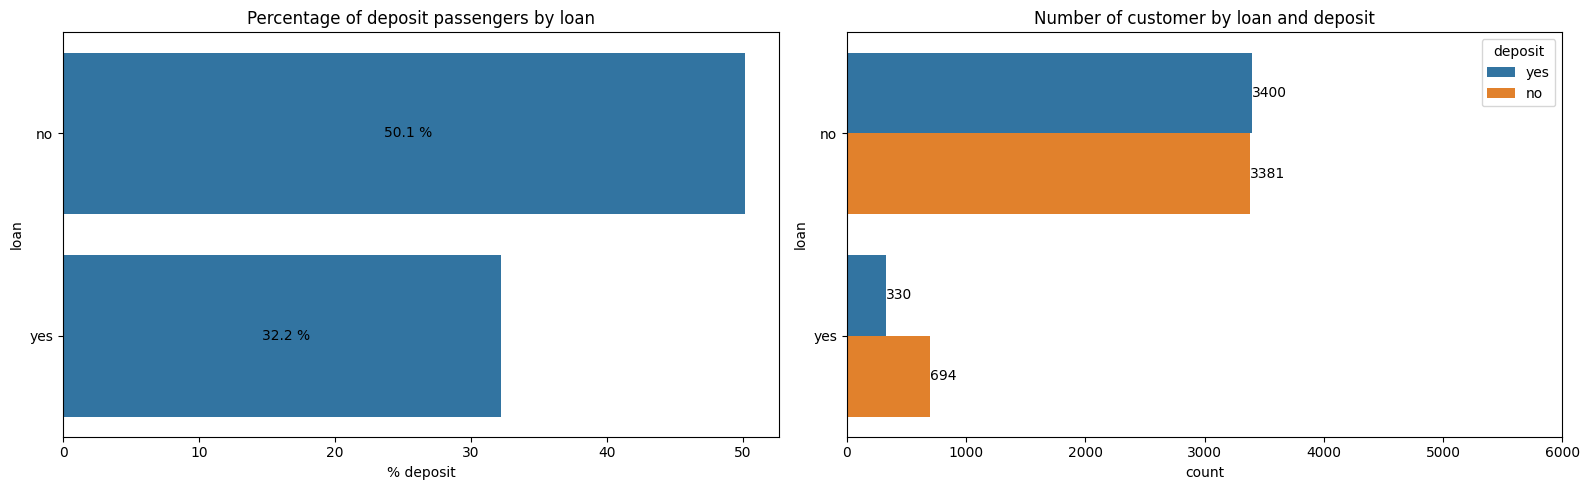

In [ ]:
create_plot(data, 'loan', x_maks=6000)

Interpretasi:

- Nasabah yang tidak memiliki hutang memiliki prosentase deposit serta total nasabah yang lebih tinggi cenderung menggunakan deposito  dibandingkan nasabah yang memiliki hutang. Hal ini dapat menunjukkan bahwa nasabah yang tidak memiliki hutang, mungkin memiliki dana yang lebih sehingga memilih investasi pada deposito.

- Nasabah yang tidak memiliki hutang hampir seimbang komposisinya jika dilihat dari yang berinvestasi dan tidak.

- Nasabah yang memiliki hutang terlihat ada juga yang berinvestasi pada deposito, namun lebih sediikit dibadningkan yang tidak melakukan investasi.



##### **Feature `contact`**

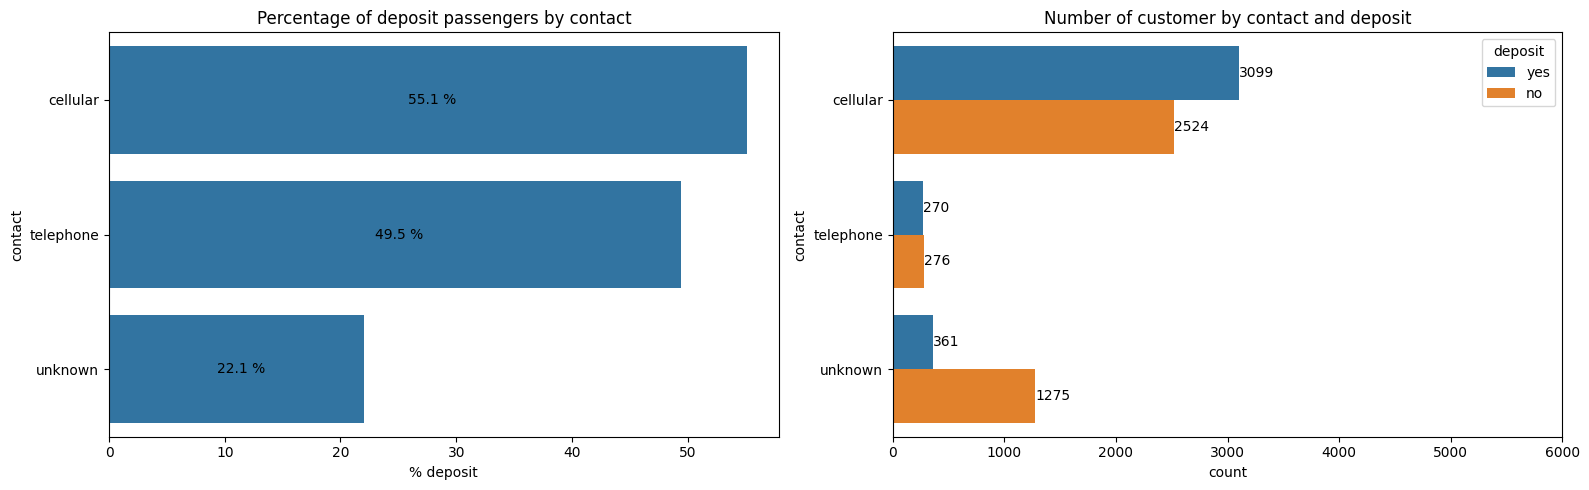

In [ ]:
create_plot(data, 'contact', x_maks=6000)

Interpretasi:

- Cellular menjadi media yang paling efektif untuk membuat nasabah berinvestasi pada deposito, dengan prosentasi tertinggi dan tingkat keberhasilan pada 'yes' lebih tinggi dari 'no'. Hal ini dapat mengindikasikan adanya kemungkinan komunikasi via cellular lebih mempengaruhi keputusan nasabah.

- Telephone menjadi media efektif kedua, dengan prosentase deposito yang juga tinggi walaupun dengan total yang terkecil.

- unknown menjadi media yang prosentase depositnya terendah dan menghasilkan penolakan lebih tinggi daripada penerimaan pada investasi deposito. Hal ini menunjukkan bahwa media ini kurang efektif, ini menjadi hal yang perlu diperhatikan oleh bank agar diisi dengan sesuai, sehingga other ini bisa lebih menggambarkan media contact yang ada.

##### **Feature `month`**

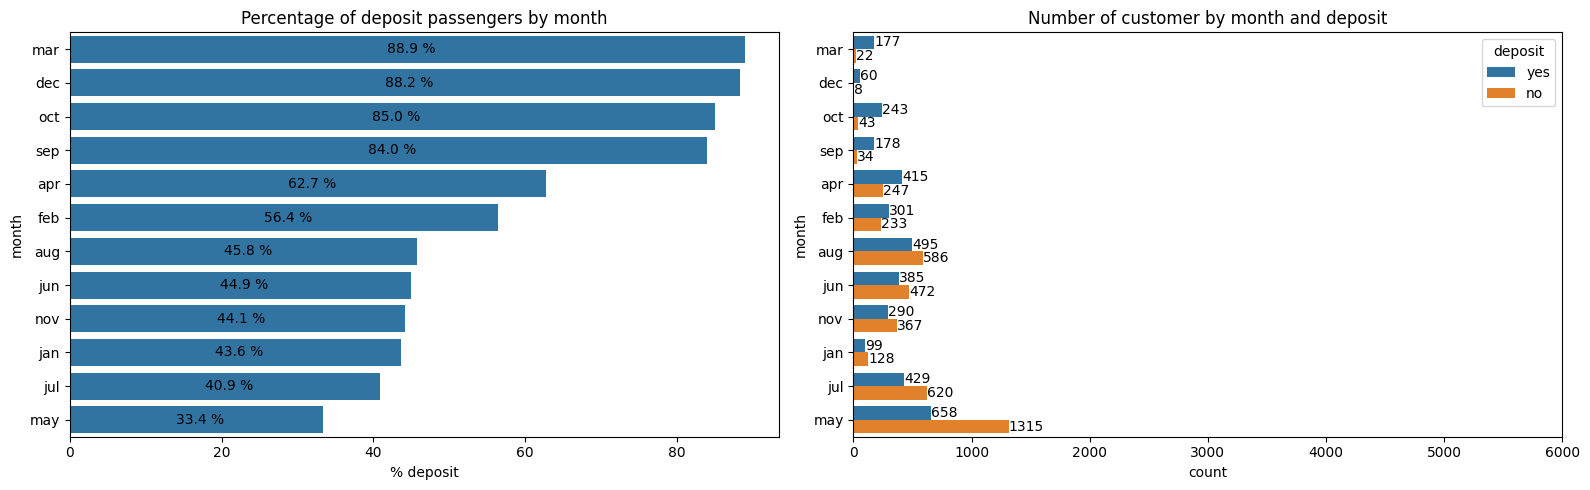

In [ ]:
create_plot(data, 'month', x_maks=6000)

Interpretasi:

- Maret, Desember, Oktober, September merupakan bulan dengan prosenatse keberhasilan deposit yang tinggi walaupun total nasabah yang dihubungi tidak setinggi bulan lain. Hal ini dapat mengindikasikan waktu yang lebih efektif dalam mendorong nasabah berinvestasi.

- April dan Februari menjadi bulan yang menunjukkan kombinasi terbaik antara total nasabah yang dihubungi denga prosentasi keberhasilan investasi. Strateginya dapat dipertimbangkan untuk mendorong nasabah investasi deposito pada bulan lainnya.

- Mei merupakan bulan dimana nasabah paling banyak dihubungi namun prosentase keberhasilan investasinya rendah. Hal ini dapat mengindikasikan bahwa hanya sebagain kecil dari nasabah pada bulan Mei yang melakukan investasi dan menjadi indikasi diperlukan strategi yang lebih baik untuk pemasaran pada bulan ini.

- Januari juga bulan dimana jumlah nasabah yang dihubungi tidak setinggi bulan lainnya dan tidak menghasilkan prosentase yang besar dalam investasi deposito, yang dapat mengindikasikan perlunya evaluasi pada strategi campaign bulan ini.

- Agustus, Juni, November, dan Juli memerlukan perbaikan dalam stratergi campaign yang dilakukan untuk meningkatkan keberhasilan investasi nasabah.

##### **Feature `poutcome`**

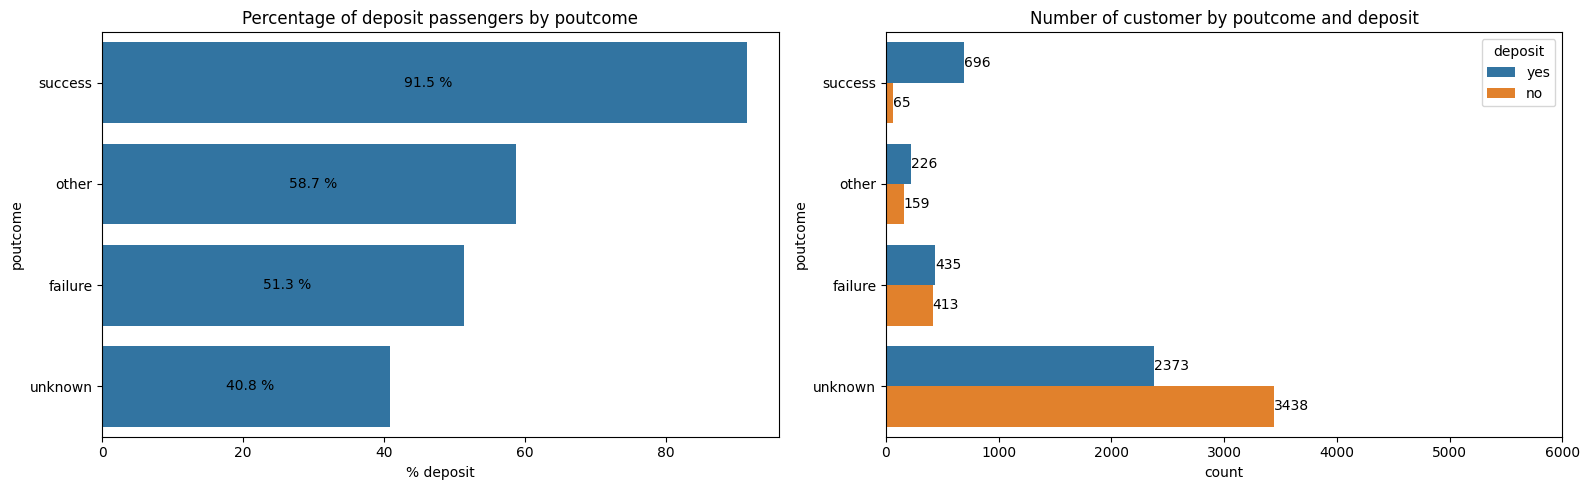

In [ ]:
create_plot(data, 'poutcome', x_maks=6000)

Interpretasi:

- Pertimbangan untuk tetap menggunakan kolom `poutcome`
    - Kategori selain 'unknown' menggambarkan informasi untuk memprediksi deposito. Kategori 'success' dan 'other' menunjukkan prosentasi keberhasilan investasi deposito yang cukup baik, sedangkan 'failure' dan 'unknown' dengan total nasabah yang besar menunjukkan potensi keberhasialan yang lebih rendah.
    - Jika tetap menggunakaan 'unknown', maka value negatif pada `pdays` harus depertimbangkan juga untuk dilakukan penanganan atau dijadikan sebagai kategori saja.

- Langkah-langkan **JIKA** tidak menggunakan kolom `poutcome`
    - Namun dengan hampir 75% data berada pada kategori 'unknown', kategori ini dapat menyebabkan ketidakvalidan dalam model.
    - Melatih dan mengevaluasi model tanpa fitur `poutcome` untuk melihat apakah terdapat perubahan signifikan pada kinerja model.
    - Bandingkan hasil model dengan feature `poutcome` dan tanpa feature `poutcome` menggunakan F1-Score.
    - Analisa apakah feature `poutcome` memberikan kontribusi positif atau negatif?

- Pertimbangkan untuk menggunakan `poutcome` dipertahankan namun tidak mebuang baris 'unknown', karena mayoritas feature ini diisi oleh kategori 'unknown', namun realisasinya terhadap deposito hanya 40.8%.

# **4. Data Preprocessing**

### **Outliers**

In [ ]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = ['age', 'balance']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,age,121,1.55,6.5,74.5
1,balance,736,9.43,-2207.5,4020.5


Interpretasi:

- Terdapat outlier pada kolom numerikal dengan persentase sekitar 1.55% - 9.43%. Kita akan mengecek proporsi dari target pada data outlier tersebut.

In [ ]:
proportion = []
indeces = []

for i, row in outlier_df.iterrows():
    outlier = data[(data[row['Column']] < row['Lower Bound']) | (data[row['Column']] > row['Upper Bound'])]
    percentages = (outlier['deposit'].value_counts(normalize=True)*100).values
    proportion.append(percentages)
    indeces.append(row['Column'])

pd.DataFrame(proportion, columns=['no', 'yes'], index=indeces)

,no,yes
age,77.685950,22.314050
balance,58.559783,41.440217


Interpretasi:

- Berdasarkan proporsi dari target pada data outlier, didapatkan bahwa outlier pada `age` dan `balance` memiliki porporsi 'yes' dan 'no' yang sama dengan kondisi awal. 

- `age` : 

    - Outlier tidak terlalu signifikan (1,55% dari total), mungkin tidak perlu penanganan secara khusus. Namun telah dilakukan proses segmentasi `age` berdasarkan domain knowledge agar lebih menggambarkan segmentasi umur dan mempermudah pemodelan (mengecilkan variasi).
    

- `balance` : 

    - Outlier pada feature ini cukup signifikan (9.43% dari total), dan propossi depositnya cukup signifikan dalam outlier, sehingga mungkin perlu penanganan khusus.

    - Mempertimbangkan melakukan binning `balance` sehingga dapat menangani outlier.

### **Collinearity**

In [ ]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

Kita akan melakukan pengujian berulang hingga diperoleh nilai VIF < 10.

In [ ]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [ ]:
vif_df

,Feature,VIF
0,age,1.250447
1,balance,1.250447


In [ ]:
dropped_columns

[]

Interpretasi:

- `age` dan `balance` tidak memiliki multikolinearitas yang signifikan. Hal ini mengindikasikan bahwa feature-feature ini tidak saling berhubungan. Sehingga tidak diperlukan tindakan khusus untuk menangani multikolinearitas untuk feature ini. 

### **Cardinality**

In [ ]:
categorical = [var for var in data.drop(columns='deposit').columns if data[var].dtypes == 'object']

In [ ]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of job: 12
Cardinality of housing: 2
Cardinality of loan: 2
Cardinality of contact: 3
Cardinality of month: 12
Cardinality of poutcome: 4
Cardinality of cat_age: 4
Cardinality of cat_job: 3


Interpretasi:

- High Cardinality (seperti pada `job` dan `month`). Untuk feature job telah dilakukan clustering berdasarkan hasil feature vs target yang direpresentasikan pada feature `cat_job`. Untuk `month`, tidak ditemukan pola dari feature vs target, sehingga akan diencoding menggunakan binary encoding saja. 

### **Imbalance Data**

In [ ]:
# Check the class distribution 
from collections import Counter

print("Class distribution:", Counter(data['deposit']))

Class distribution: Counter({'no': 4075, 'yes': 3730})


In [ ]:
prosentase_deposit=(data['deposit'].value_counts(normalize=True)*100).round(2)
prosentase_deposit

deposit
no     52.21
yes    47.79
Name: proportion, dtype: float64

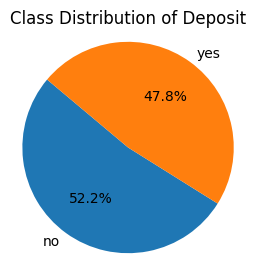

In [ ]:
plt.figure(figsize=(3, 3))
plt.pie(prosentase_deposit, labels=prosentase_deposit.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Deposit')
plt.axis('equal') 
plt.show()

Interpretasi:

- Berdasarkan tabel [imbalance](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets):

    | Percentage of data belonging to minority class | Degree of imbalance |
    | ----------------------------- | ----------- |
    | 20-40% of the dataset | Mild |
    | 1-20% of the dataset | Moderate |
    | <1% of the dataset | Extreme |
>
- Data menunjukkan bahwa perbedaan antara 'yes' dan 'no' dalam `deposit` tidak cukup besar (4.42%) untuk katakan sebagai data imbalance. Sehingga tidak akan dilakukan resampling data.


### **Feature Engineering**

- Sebelum memutuskan untuk menggunakan feature yang mana atau proses encodingnya seperti apa, dilakukan eksperimen berdasarkan skenario feature (berdasarkan hasil eksplorasi data dan feature vs target pada bab sebelumnya) yang akan digunakan dan proses encoding yang akan digunakan. Yang secara lengkap dapat dilihat pada file **experiment_model.ipynb**

- Skenario :

    - Skenario 1 : eksperimen tanpa menggunakan feature `pdays` dan `poutcome` 

    - Skenario 2 : eksperimen tanpa menggunakan feature `pdays`

    - Skenario 3 : eksperimen menggunakan semua feature yang ada

- Eksperimen model :

    - Eksperimen model 1 :

        - Data lengkap tidak ada yang dihapus. (dengan Skenario 1, Skenario 2, dan Skenario 3)

        - Model yang dibandingkan:

            - LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, dan XGBClassifier

        - Encoding :

            | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
            |------------------|----------------------------|---------------------------------|
            | Ordinal          | `OrdinalEncoder()`         | `cat_age`                        |
            | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
            | Binary            | `BinaryEncoder()`          | `month`                          |

    - Eksperimen model 2 :

        - Data lengkap tidak ada yang dihapus. (dengan Skenario 1, Skenario 2, dan Skenario 3)

        - Model yang dibandingkan:LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, dan XGBClassifier

        - Encoding:

            | **Transformer Type**     | **Transformer Object**                                                 | **Columns Transformed**                     |
            |--------------------------|------------------------------------------------------------------------|---------------------------------------------|
            | Ordinal                  | `OrdinalEncoder()`                                                      | `cat_age`                                   |
            | Binning Ordinal          | `KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')`      | `balance`                                   |
            | One-Hot                   | `OneHotEncoder(drop='first')`                                            | `cat_job`, `housing`, `loan`, `contact`     |
            | Binary                   | `BinaryEncoder()`                                                        | `month`                                     |
    
    - Ekperimen model 3 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, dan XGBClassifier

        - Encoding :

            | **Transformer Type**     | **Transformer Object**                                                 | **Columns Transformed**                     |
            |--------------------------|------------------------------------------------------------------------|---------------------------------------------|
            | Ordinal                  | `OrdinalEncoder()`                                                      | `cat_age`                                   |
            | Binning Ordinal          | `KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')`      | `balance`                                   |
            | One-Hot                   | `OneHotEncoder(drop='first')`                                            | `cat_job`, `housing`, `loan`, `contact`     |
            | Binary                   | `BinaryEncoder()`                                                        | `month`                                     |
    
    - Ekperimen model 4 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

        - Encoding :

            | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
            |------------------|----------------------------|---------------------------------|
            | Ordinal          | `OrdinalEncoder()`         | `cat_age`                        |
            | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
            | Binary            | `BinaryEncoder()`          | `month`                          |
    
    - Ekperimen model 5 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). Menggunakan feature `age` bukan `cat_age`. (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

        - Encoding :

            | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
            |------------------|----------------------------|---------------------------------|
            | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
            | Binary            | `BinaryEncoder()`          | `month`                          |    

    - Ekperimen model 6 :

        - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1)). (dengan Skenario 1, Skenario 2, dan Skenario 3)
    
        - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

        - Encoding :

            | **Transformer Type**     | **Transformer Object**                                                 | **Columns Transformed**                     |
            |--------------------------|------------------------------------------------------------------------|---------------------------------------------|
            | Ordinal                  | `OrdinalEncoder()`                                                      | `cat_age`                                   |
            | Binning Ordinal          | `KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')`      | `balance`                                   |
            | One-Hot                  | `OneHotEncoder(drop='first')`                                            | `cat_job`, `housing`, `loan`, `contact`     |
            | Binary                   | `BinaryEncoder()`                                                        | `month`                                     |


- Scalling: Robust Scaler, karena terdapat data yang memiliki outlier. RobustScaler dapat membantu akurassi model dan stabilitas prediksi. Pada dataset, kita memiliki feature `balance` yang mana memiliki rentang nilai yang cukup besar, sehingga dengan robust kita akan dapat menyamakan skala dan mengurangi pengaruh dari outlier.

- Analisa Hasil :

    - Penbandingan Skenario 1 vs Skenario 2 Vs Skenario 3: berdasarkan modeling experiment, skenario 3 (dengan feature `pdays` dan `poutcome`) menunjukkan hasil yang lebih baik dibandingkan dengan skenario 1 dan skenario 2. Hal ini dapat menunjukan bahwa penambahan feature yang berkaitan mungkin dapat memberikan informasi tambahan yang berharga untuk model, yang meningkatkan kinerja secara keseluruhan. Hal ini juga dapat menjadi masukkan untuk Bank, untuk menambahkan feature-feature terkait nasabah dalam konteks persyaratan investasi deposito.

- Analisa Eksperimen :

    - Jika dibandingkan performa dari eksperimen 1 sampai 6, didapatkan bahwa eksperiment 4 dengan skenario 3 adalah yang terbaik.

- Bedasarkan eksperimen pemilihan data, modeling, encoding, dan skenario, maka kita akan menggunakan :

    - Data di filter tanpa ((data['balance']<0)&(data['deposit']==1))
        
    - Skenario yang digunakan : Skenario 3 eksperimen menggunakan feature `cat_age`, `cat_job`, `balance`, `housing`, `loan`, `contact`, `month`, `campaign`, `pdays`,`poutcome`,`deposit`
    
    - Model yang dibandingkan : LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier, MLPClassifier, dan SVC

    - Encoding :

        | **Encoder Type** | **Encoder Object**         | **Columns Transformed**         |
        |------------------|----------------------------|---------------------------------|
        | Ordinal          | `OrdinalEncoder()`         | `cat_age`                        |
        | One-Hot           | `OneHotEncoder(drop='first')` | `cat_job`, `housing`, `loan`, `contact` |
        | Binary            | `BinaryEncoder()`          | `month`                          |

#### **Replace Data**

In [ ]:
data['deposit']=data['deposit'].map({'yes':1, "no":0}).astype(int)

# **5. Modeling**

## **Model Selection**

In [ ]:
filter_data=data[~((data['balance']<0)&(data['deposit']==1))]
filter_data

# Scaling
scaler = RobustScaler()

# Define the models
# Logistic Regression 
logreg = LogisticRegression(max_iter=1000)

# KNN
knn = KNeighborsClassifier()

# Decision Tree
tree = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.ensemble._weight_boosting')
adaboost = AdaBoostClassifier( random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

# LightGradientBoosting
lgbm = lgb.LGBMClassifier(random_state=0)

# CatBoostClassifier
catboost = CatBoostClassifier(random_state=0, verbose=0)

# SupportVector
svm = SVC(probability=True, random_state=0)

# Multi-layerPerceptron
mlp = MLPClassifier(max_iter=500, random_state=0)

In [ ]:
data.head(1)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,cat_age,cat_job
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,Middle-Age,job1


In [ ]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

filter_data3=filter_data[['cat_age', 'cat_job', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays','poutcome','deposit']]
filter_data3.head()

# Features
X = filter_data3.drop(columns='deposit')

# target
y = filter_data3['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)



# Column Transformer

preproceessor=ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(),['cat_age' ]),
        ('one hot', OneHotEncoder(drop='first'), ['cat_job', 'housing', 'loan', 'contact','poutcome']),
        ('binary', BinaryEncoder(), ['month'])
    ],remainder='passthrough'
)
preproceessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(), ['cat_age']),
                                ('one hot', OneHotEncoder(drop='first'),
                                 ['cat_job', 'housing', 'loan', 'contact',
                                  'poutcome']),
                                ('binary', BinaryEncoder(), ['month'])])

In [ ]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost,lgbm,catboost,svm,mlp]

f1_mean = []
f1_std = []
all_f1 = []
model_name = []


# Mencari model terbaik berdasarkan rerata f1 score terkecil dan std terkecil
for algoritma in models:

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits = 5)

    model_cv = cross_val_score(
        estimator=model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
        X=X_train,                    # data sebelum di preprocessing
        y=y_train, 
        cv = skfold, 
        scoring = 'f1',
        error_score='raise'
        )
    
    f1_mean.append(model_cv.mean())
    f1_std.append(model_cv.std())
    all_f1.append(model_cv.round(4))
    model_name.append(algoritma.__class__.__name__)

[LightGBM] [Info] Number of positive: 2297, number of negative: 2608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468298 -> initscore=-0.126980
[LightGBM] [Info] Start training from score -0.126980
[LightGBM] [Info] Number of positive: 2297, number of negative: 2608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 17
[LightGBM] [Info] [binary:

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
pd.DataFrame({
    'model': model_name,
    'mean': f1_mean,
    'std': f1_std,
    'all_score' : all_f1
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
8,CatBoostClassifier,0.688911,0.006761,"[0.6787, 0.6983, 0.6886, 0.6937, 0.6852]"
5,GradientBoostingClassifier,0.680697,0.008810,"[0.6686, 0.6791, 0.6835, 0.6954, 0.677]"
7,LGBMClassifier,0.675009,0.006399,"[0.6667, 0.6685, 0.683, 0.6768, 0.6801]"
10,MLPClassifier,0.674888,0.007018,"[0.6797, 0.6655, 0.6673, 0.6804, 0.6816]"
4,AdaBoostClassifier,0.670539,0.006981,"[0.6654, 0.6752, 0.6625, 0.6816, 0.6679]"
3,RandomForestClassifier,0.666130,0.013681,"[0.64, 0.6759, 0.6771, 0.6722, 0.6655]"
6,XGBClassifier,0.666042,0.007897,"[0.654, 0.6637, 0.6655, 0.6785, 0.6685]"
0,LogisticRegression,0.660960,0.009576,"[0.6679, 0.6755, 0.6485, 0.6566, 0.6563]"
1,KNeighborsClassifier,0.660864,0.010532,"[0.644, 0.6673, 0.6714, 0.6532, 0.6685]"
9,SVC,0.647158,0.029316,"[0.6063, 0.6634, 0.6761, 0.6725, 0.6174]"


In [ ]:
from sklearn.metrics import f1_score
list_f1 = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    model_pipe = Pipeline([
        ('transformer', preproceessor),
        ('scaler', scaler),
        ('model', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred)
    list_f1.append(score)

[LightGBM] [Info] Number of positive: 2872, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 6132, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468363 -> initscore=-0.126719
[LightGBM] [Info] Start training from score -0.126719


In [ ]:
# Perbandingan performa antar model
pd.DataFrame({
    'model': model_name,
    'f1(test_set)': list_f1
}).sort_values('f1(test_set)', ascending=False)

,model,f1(test_set)
8,CatBoostClassifier,0.713650
7,LGBMClassifier,0.706056
10,MLPClassifier,0.701832
6,XGBClassifier,0.700515
5,GradientBoostingClassifier,0.699405
4,AdaBoostClassifier,0.685590
3,RandomForestClassifier,0.674931
9,SVC,0.673896
0,LogisticRegression,0.666171
1,KNeighborsClassifier,0.658466


Interpretasi:

- Berdasarkan hasil evaluasi, CatBoostClassifier menunjukkan peforma terbaik dengan f1-score tertinggi, menandakan kemampuannya yang unggul dalam mendeteksi nasabah potensial. 

- LGBMClassifier juga menunjukkan performa sangat baik dan dapat menjadi alternatif model.

- MLPClassifier, XGBClassifier, GradientBoostingClassifier, dan AdaBoostClassifier memberikan f1-score yang baik namun sedikit dibawah model LGBMClassifier. 

- LogisticRegression, KNeighborsClassifier, dan DecisionTreeClassifier memiliki f1-score yang efektivitasnya lebih rendah dalam konteks ini.

- Dengan fokus pada f1-score, CatBoostClassifier, LGBMClassifier, MLPClassifier, XGBClassifier, dan GradientBoostingClassifier merupakan pilihan utama yang direkomendasikan untuk identifikasi sebanyak mungkin nasabah potensial, sehingga Bank bisa mendahulukan nasabah potensial untuk target telemarketer. Untuk itu, akan dilakukan hyperparameter tuning pada model terpilih, untuk melihat, apakah akan menambah peforma model ketika dilakukan pengaturan parameter.

## **Hyperparameter Tuning**

### **CatBoostClassifier**

In [ ]:
# CatBoostClassifier?

In [ ]:
from scipy.stats import uniform, randint

param_dist_catboost={
    'model__learning_rate': uniform(0.05,0.05), 
    'model__n_estimators': randint(150,200),  
    'model__depth': randint(4,6),          
    'model__l2_leaf_reg': uniform(1,2),         
    'model__border_count': randint(90,95),    
    'model__subsample': uniform(0.7,0.2),    
    'model__bagging_temperature': uniform(0.5,1)   
}

catboost = CatBoostClassifier(random_state=0, silent=True)
scaler=RobustScaler()
skf=StratifiedKFold(n_splits=5)

estimator_catboost = Pipeline([
    ('transformer', preproceessor),
    ('scaler', scaler),
    ('model', catboost)
])

randomized_catboost=RandomizedSearchCV(
    estimator=estimator_catboost, 
    param_distributions=param_dist_catboost, 
    n_iter=400,
    cv=skf, 
    scoring='f1', 
    n_jobs=-1, 
    random_state=0
)

In [ ]:
# Fit the model (replace X_train and y_train with your data)
randomized_catboost.fit(X_train, y_train)

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['cat_age']),
                                                                              ('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['cat_job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['month'])]))...
                                        'model__l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FCA9644890>,
                                        'model__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FCC17AAF30>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCA96F9760>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FCABCFF5C0>},
                   random_state=0, scoring='f1')

In [ ]:
print(f'Akurasi terbaik pada train set: {randomized_catboost.best_score_:.4f}')
print(f'Parameter terbaik pada train set: {randomized_catboost.best_params_}')

Akurasi terbaik pada train set: 0.6917
Parameter terbaik pada train set: {'model__bagging_temperature': 0.896234481771571, 'model__border_count': 91, 'model__depth': 5, 'model__l2_leaf_reg': 2.927825982476074, 'model__learning_rate': 0.06517106318631141, 'model__n_estimators': 153, 'model__subsample': 0.7244171213672934}


In [ ]:
# Best Tuned Model
best_model=randomized_catboost.best_estimator_

# Fitting model
best_model.fit(X_train,y_train)

# Predict to test set
y_pred_tuned=best_model.predict(X_test)

test_score=f1_score(y_test, y_pred_tuned)

print(f'Akurasi score pada test set setelah tuning:{test_score:.7f}')

Akurasi score pada test set setelah tuning:0.7012792


### **GradientBoostingClassifier**

In [ ]:
from scipy.stats import uniform, randint

param_dist_gradboost = {
    'model__learning_rate': uniform(0.01, 0.3),        
    'model__n_estimators': randint(50, 200),          
    'model__max_depth': randint(3, 10),                
    'model__min_samples_split': randint(2, 20),       
    'model__min_samples_leaf': randint(1, 20),   
    'model__subsample': uniform(0.5, 0.5),   
    'model__max_features': uniform(0.5, 0.5)     
}

# Initialize gradBoostClassifier
gradboost = GradientBoostingClassifier(random_state=0)

# Define the preprocessor and scaler
scaler = RobustScaler()

# Stratified cross-validation
skf = StratifiedKFold(n_splits=5)

# Create the pipeline
estimator_gradboost = Pipeline([
    ('transformer', preproceessor),
    ('scaler', scaler),
    ('model', gradboost)
])

# Randomized search with RandomizedSearchCV
randomized_gradboost = RandomizedSearchCV(
    estimator=estimator_gradboost, 
    param_distributions=param_dist_gradboost, 
    n_iter=300,
    cv=skf, 
    scoring='f1', 
    n_jobs=-1, 
    random_state=0
)

In [ ]:
# Fit the model (replace X_train and y_train with your data)
randomized_gradboost.fit(X_train, y_train)

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['cat_age']),
                                                                              ('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['cat_job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['month'])]))...
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCA9949B50>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCA96C39E0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCA9647860>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FCC172CAA0>},
                   random_state=0, scoring='f1')

In [ ]:
print(f'Akurasi terbaik pada train set: {randomized_gradboost.best_score_:.4f}')
print(f'Parameter terbaik pada train set: {randomized_gradboost.best_params_}')

Akurasi terbaik pada train set: 0.6877
Parameter terbaik pada train set: {'model__learning_rate': 0.08075026723169064, 'model__max_depth': 3, 'model__max_features': 0.9199032621071571, 'model__min_samples_leaf': 6, 'model__min_samples_split': 19, 'model__n_estimators': 106, 'model__subsample': 0.7452099542181376}


In [ ]:

# Best Tuned Model
best_model = randomized_gradboost.best_estimator_

# Fitting model
best_model.fit(X_train, y_train)

# Predict to test set
y_pred_tuned = best_model.predict(X_test)

# f1 Score
test_score=f1_score(y_test, y_pred_tuned)

print(f'Akurasi score pada test set setelah tuning: {test_score:.7f}')

Akurasi score pada test set setelah tuning: 0.7002221


### **LGBMClassifier**

In [ ]:
from lightgbm import LGBMClassifier

param_dist_lgbmboost = {
    'model__num_leaves' : [1, 11, 21, 31, 41],
    'model__min_data_in_leaf' : [15, 20, 25, 30, 45],
    'model__max_bin' : [200, 225, 255, 275, 300],
    'model__num_iterations' : [125, 150, 175, 200, 225],
    'model__learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'model__random_state' : [0]
}

# Initialize lgbmBoostClassifier
lgbmboost = LGBMClassifier(random_state=0)

# Define the preprocessor and scaler
scaler = RobustScaler()

# Stratified cross-validation
skf = StratifiedKFold(n_splits=5)

# Create the pipeline
estimator_lgbmboost = Pipeline([
    ('transformer', preproceessor),
    ('scaler', scaler),
    ('model', lgbmboost)
])

# Randomized search with RandomizedSearchCV
randomized_lgbmboost = RandomizedSearchCV(
    estimator=estimator_lgbmboost, 
    param_distributions=param_dist_lgbmboost, 
    n_iter=400,
    cv=skf, 
    scoring='f1', 
    n_jobs=-1, 
    random_state=0
)

In [ ]:
# Fit the model (replace X_train and y_train with your data)
randomized_lgbmboost.fit(X_train, y_train)

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
400 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fauzi\Ap

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 2872, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 6132, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468363 -> initscore=-0.126719
[LightGBM] [Info] Start training from score -0.126719


c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['cat_age']),
                                                                              ('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['cat_job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['month'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              LGBMClassifier(random_state=0))]),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.001, 0.01,
                                                                 0.1, 1, 10],
                                        'model__max_bin': [200, 225, 255, 275,
                                                           300],
                                        'model__min_data_in_leaf': [15, 20, 25,
                                                                    30, 45],
                                        'model__num_iterations': [125, 150, 175,
                                                                  200, 225],
                                        'model__num_leaves': [1, 11, 21, 31,
                                                              41],
                                        'model__random_state': [0]},
                   random_state=0, scoring='f1')

In [ ]:
print(f'Akurasi terbaik pada train set: {randomized_lgbmboost.best_score_:.4f}')
print(f'Parameter terbaik pada train set: {randomized_lgbmboost.best_params_}')

Akurasi terbaik pada train set: 0.6844
Parameter terbaik pada train set: {'model__random_state': 0, 'model__num_leaves': 11, 'model__num_iterations': 150, 'model__min_data_in_leaf': 20, 'model__max_bin': 200, 'model__learning_rate': 0.1}


In [ ]:
# Best Tuned Model
best_model = randomized_lgbmboost.best_estimator_

# Fitting model
best_model.fit(X_train, y_train)

# Predict to test set
y_pred_tuned = best_model.predict(X_test)

test_score=f1_score(y_test, y_pred_tuned) 

print(f'Akurasi score pada test set setelah tuning: {test_score:.7f}')

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 2872, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 6132, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468363 -> initscore=-0.126719
[LightGBM] [Info] Start training from score -0.126719
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Akurasi score pada test set setelah tuning: 0.7024981


c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


### **XGBClassifier**

In [ ]:
param_dist_xgb = {
    'model__num_leaves' : [1, 11, 21, 31, 41],
    'model__min_data_in_leaf' : [15, 20, 25, 30, 45],
    'model__max_bin' : [200, 225, 255, 275, 300],
    'model__num_iterations' : [125, 150, 175, 200, 225],
    'model__learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'model__random_state' : [0]
}

# Initialize lgbmBoostClassifier
xgb = XGBClassifier(random_state=0)

# Define the preprocessor and scaler
scaler = RobustScaler()

# Stratified cross-validation
skf = StratifiedKFold(n_splits=5)

# Create the pipeline
estimator_xgb = Pipeline([
    ('transformer', preproceessor),
    ('scaler', scaler),
    ('model', xgb)
])

# Randomized search with RandomizedSearchCV
randomized_xgb = RandomizedSearchCV(
    estimator=estimator_xgb, 
    param_distributions=param_dist_xgb, 
    n_iter=400,
    cv=skf, 
    scoring='f1', 
    n_jobs=-1, 
    random_state=0
)

In [ ]:
# Fit the model (replace X_train and y_train with your data)
randomized_xgb.fit(X_train, y_train)

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_data_in_leaf", "num_iterations", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['cat_age']),
                                                                              ('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['cat_job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['month'])]))...
                                                            num_parallel_tree=None,
                                                            random_state=0, ...))]),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.001, 0.01,
                                                                 0.1, 1, 10],
                                        'model__max_bin': [200, 225, 255, 275,
                                                           300],
                                        'model__min_data_in_leaf': [15, 20, 25,
                                                                    30, 45],
                                        'model__num_iterations': [125, 150, 175,
                                                                  200, 225],
                                        'model__num_leaves': [1, 11, 21, 31,
                                                              41],
                                        'model__random_state': [0]},
                   random_state=0, scoring='f1')

In [ ]:
print(f'Akurasi terbaik pada train set: {randomized_xgb.best_score_:.4f}')
print(f'Parameter terbaik pada train set: {randomized_xgb.best_params_}')

Akurasi terbaik pada train set: 0.6810
Parameter terbaik pada train set: {'model__random_state': 0, 'model__num_leaves': 41, 'model__num_iterations': 175, 'model__min_data_in_leaf': 30, 'model__max_bin': 275, 'model__learning_rate': 0.1}


In [ ]:
# Best Tuned Model
best_model = randomized_xgb.best_estimator_

# Fitting model
best_model.fit(X_train, y_train)

# Predict to test set
y_pred_tuned = best_model.predict(X_test)

test_score=f1_score(y_test, y_pred_tuned) 

print(f'Akurasi score pada test set setelah tuning: {test_score:.7f}')

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_data_in_leaf", "num_iterations", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


Akurasi score pada test set setelah tuning: 0.7069486


### **Kesimpulan Hyperparameter Tuning**

| F1 Score | Train Set | Test Set |
| --- | --- | --- |
| XGBClassifier Before Tuning | 0,6660 | 0,7005 |
| XGBClassifier After Tuning | 0,6810 | 0,7069 |
| LGBMClassifier Before Tuning | 0,6750 | 0,7060 |
| LGBMClassifier After Tuning | 0,6844 | 0,7024 |
| CatBoostClassifier Before Tuning | 0,6889 | 0,7136 |
| CatBoostClassifier After Tuning | 0,6917 | 0,7012 |
| GradientBoostingClassifier Before Tuning |0,6806 | 0,6994 |
| GradientBoostingClassifier After Tuning | 0,6877 | 0,7002 |

MLPClassifier : terlalu lama komputasi dalam hypertuning, sehinggga diputuskan untuk tidak di tunning

Interpretasi:

- Berdasarkan hasil evaluasi dari before dan after hypertunning, CatBoostClassifier menjadi model pilihan terbaik pada kasus ini. Hal ini karena f1 score pada CatBoostClassifier adalah cukup tinggi pada data test sebelum tuning dan dengan standar deviasi yang rendah, CatBoostClassifier menunjukkan stabilitas performa yang baik.

- Tuning pada CatBoostClassifier menunjukkan bahwa tunning yang dilakukan membantu model dalam meningkatkan kinerja data train, meskipun terdapat sedikit penurunan di data test. Hal ini dapat dijelaskan oleh penggunaan Randomized Search yang membantu efiesiensi waktu komputasi. RandomizedSearch memberikan keseimbangan antara waktu dan pencarian hyperparameter, namun tidak selalu menemukan kombinasi yang optimal yang mungkin diperoleh dengan mmetode pencarian yang lebih ekstensif. Namun penurunan pada data test hasil tuning masih sangat kompetitif jika dilihat dari standar deviasinya. Sehingga CatBoostClassifier masih menjadi pilihan yang terbaik pada kasus ini.

## **Model Evaluation**

In [ ]:
randomized_catboost.best_estimator_

c:\Users\fauzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['cat_age']),
                                                 ('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['cat_job', 'housing', 'loan',
                                                   'contact', 'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['month'])])),
                ('scaler', RobustScaler()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000001FCAB316300>)])

In [ ]:
# final Tuned Model
final_model = randomized_catboost.best_estimator_

# Fitting model
final_model.fit(X_train, y_train)

# Predict to test set
y_pred = final_model.predict(X_test)

test_score=f1_score(y_test, y_pred,)

print(f'Akurasi score pada test set setelah tuning: {test_score:.4f}')

Akurasi score pada test set setelah tuning: 0.7013


In [ ]:
randomized_catboost.best_params_

{'model__bagging_temperature': 0.896234481771571,
 'model__border_count': 91,
 'model__depth': 5,
 'model__l2_leaf_reg': 2.927825982476074,
 'model__learning_rate': 0.06517106318631141,
 'model__n_estimators': 153,
 'model__subsample': 0.7244171213672934}

## **Best Algorithm**

- CatBoostClassifier merupakan salah satu algoritma machine learning yang populer untuk klasifikasi dan regresi dan sangat cocok untuk kasus yang melibatkan penilaian potensi nasabah untuk berinvestasi berdasarkan profil nasbah dan data hasil campaign sebelumnya. Sehingga bank dapat meningkatkan akurasi dalam menilai potensi investasi nasabah dan mengoptimalkan campaign telemarketing bank, untuk memaksimalkan keuntungan.

- Parameter terbaik dari hasil randomized search untuk CatBoostClassifier:

    - 'model__bagging_temperature': 0.896 -> parameter ini mengontrol intensitas bagging dalam model. Nilai yang relatif lebih tinggi menunjukkan bahwa model diatur untuk mengoptimalkan pengurangan overfitting.

    - 'model__border_count': 91 -> parameter ini membatasi feature kategorikal. Nilai yang lebih tinggi memungkinkan model untuk menangkap lebih banyak informasi dari feature kategorkal, yang dapat meningkatkan akurasi jika feature kategorikal memainkan peran penting dalam dataset.

    - 'model__depth': 5 -> parameter ini membatasi kedalaman maksimum decission treee. Kedalaman yang lebih tinggi dapat memodelkan hubungan yang lebih kompleks namun dapat meningkatkan resiko overfitting, sehingga didapatkan angka 5 sebagai kedalaman yang baik antara kompleksitas model dan kemampuannya bergeneralisasi.

    - 'model__l2_leaf_reg': 2.927 -> parameter ini membantu model untuk generalisasi yang lebih baik dengan mengindari training berlebihan dari data train.

    - 'model__learning_rate': 0.065 -> parametre ini menunjukkan kecepatan pembelajaran model. Nilai yang lebih rendah dapat membuat model lebih lambat namun lebih stabil, sehingga dapat mempelajari pola dengan hati-hati untuk meningkatkan akurasi.

    - 'model__n_estimators': 153 -> jumlah estimator dalam model. Semakin banyak estimator, maka akurasi semakin meningkat, namun waktu trainning juga akan meningkat. 162 merupaka nilai yang ditemukan untuk menangkap pola data secara efektif.

    - 'model__subsample': 0.724 -> parameter ini merupakan subsampling yang dapat mengurangi overfitting dengan memberikan variasi dalam data yang dilatih. Nilai ini menunjukkan bahwa sebagian besar data digunakan tetapi tidak seluruhnya, sehingg memberikan keseimbangakn antara pelatihan dan generalisasi.

- CatBoostClassifier pada kasus ini telat dioptimalkan dengan RandomizedSearch, untuk evaluasi kedepannya, model dapat mengoptimalkan peformanya dnegan menggunakan GridSearch. GridSearch memungkinkan pencarian parameter yang lebih menyeluruh dan bisa membantu menemukan kombinasi hyperparameter yang lebih optimal. Mengintegrasikan hasil GridSearch dengan analisis peforma tambahan seperti recall-score ataupun ROC-AUC, serta menerapkan teknik validasai yang  kuat akan memberikan pemahaman yang lebih mendalah mengenaik konerja model. Namun, matrix harus di sesuaikan dengan tujuan dari pemodelan.

## **Limitasi Model**

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel. Perlu diingat kembali, bahwa data yang digunakan adalah data yang telah dihapus ((`balance`<0) & (`deposit`=1)), sehingga model ini hanya berlaku pada rentang daya yang digunakan pada pemodelan ini, yaitu:

- `age` antara 18 sampai dengan 95 tahun
- `balance` antara -6.847 hingga 66.653
- `campaign` antara 1 hingga 63 kali
- `pdays` antara -1 hingga 854 hari

In [ ]:
filter_data.describe()

,age,balance,campaign,pdays,deposit
count,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000
mean,41.308415,1547.308937,2.524984,51.371429,0.468363
std,11.946563,3108.255536,2.745072,107.789083,0.499031
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,144.000000,1.000000,-1.000000,0.000000
50%,39.000000,569.000000,2.000000,-1.000000,0.000000
75%,49.000000,1716.000000,3.000000,48.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


In [ ]:
filter_data.describe(include=object)

,job,housing,loan,contact,month,poutcome,cat_age,cat_job
count,7665,7665,7665,7665,7665,7665,7665,7665
unique,12,2,2,3,12,4,4,3
top,management,no,no,cellular,may,unknown,Adults,job1
freq,1779,4104,6688,5519,1918,5700,4698,5258


## **Learning Curve**

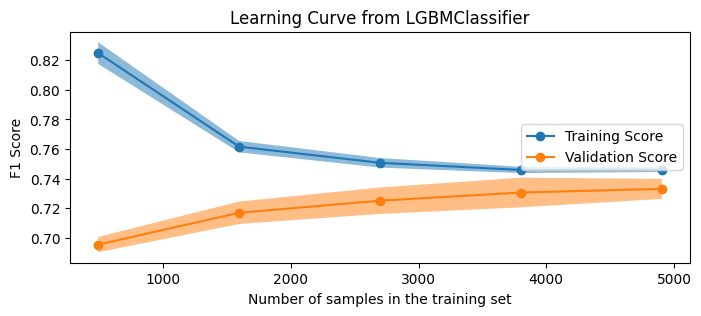

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

fig, ax=plt.subplots(figsize=(8,3))


common_params={
    "X":X_train,
    "y":y_train,
    "train_sizes":np.linspace(0.1,1,5),
    "cv":5,
    "score_type":"both",
    "n_jobs":4,
    "line_kw":{'marker': 'o'},
    "score_name":f1_score}

LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

handles,label = ax.get_legend_handles_labels()
ax.legend(handles[:2],['Training Score','Validation Score'],loc='center right')
ax.set_title(f'Learning Curve from LGBMClassifier')
ax.set_ylabel('F1 Score')

plt.show()

Interpretasi:

- Selisih skor antara train score dan validscore menurun seiring dengan bertambahnya size data training, yang dapat menunjukkan bahwa model ini semakin mampu menggeneralisasi seiring dengan bertambahnya ukuran data train.

- Stabilitas skor antara train score dan valid score relatif kecil dan konsisten, yang dapat menunjukkan bahwa variabilitas skor  yang cukup stabil.

- Evaluasi model : model mengalami everfitting pada ukuran data train yang lebih kecil, namun semakin berkurang seiring dengan bertambahnya ukuran data. Pada ukuran data yang lebih besar, model dapat menunjukkan perbedaan skor yang lebih kecil antara data training dan validasi, yang berati peforma pada data validasi hampir menyamai peforma data training.

- Sebagai improvement, dapat dilakukan percobaan dengan teknik regulasi ataupun cross-validation yang lebih mendalam untuk lebih meningkatkan kemampuan generalisasi model.

## **Feature Importances**

In [ ]:
importances = model.get_feature_importance()
print(f"Shape of importances: {len(importances)}")

Shape of importances: 17


In [ ]:
# Misalkan jumlah fitur dan importances sudah cocok
importance_df = pd.DataFrame({
    'Feature': feature_names[:len(importances)],  # Menyesuaikan panjang
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
transformers = estimator_catboost.named_steps['transformer'].transformers_

ordinal_features = ['cat_age']
onehot_encoder = transformers[1][1]
onehot_features = list(onehot_encoder.get_feature_names_out())
binary_encoder = transformers[2][1]
binary_features = list(binary_encoder.get_feature_names_out())

remainder_indices = transformers[-1][2]
if isinstance(remainder_indices, list):
    remainder_features = list(X_train.columns[remainder_indices])
else:
    remainder_features = list(X_train.columns)

feature_names = ordinal_features + onehot_features + binary_features + remainder_features

model = randomized_catboost.best_estimator_.named_steps['model']
importances = model.get_feature_importance()

if len(feature_names) != len(importances):
    print(f"Jumlah fitur ({len(feature_names)}) tidak sesuai dengan jumlah importances ({len(importances)})")
    feature_names = feature_names[:len(importances)]

# DataFrame fitur penting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df

Jumlah fitur (24) tidak sesuai dengan jumlah importances (17)


,Feature,Importance
14,cat_age,16.666830
6,contact_unknown,16.079354
8,poutcome_success,13.057259
12,month_2,7.520077
10,month_0,7.256397
3,housing_yes,7.213680
16,balance,6.901487
0,cat_age,6.116862
13,month_3,5.567670
15,cat_job,4.228371


In [ ]:
binary_encoder = final_model.named_steps['transformer'].named_transformers_['binary']
binary_mapping = binary_encoder.mapping

month_mapping = {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec',-1: 'Unknown',-2: 'Unknown'}

mapping_data = []

for mapping in binary_mapping:
    col_name = mapping['col']
    mapping_df = mapping['mapping']
    # Tambahkan informasi ke list dengan nama bulan
    for index, row in mapping_df.iterrows():
        month_name = month_mapping.get(index, 'Unknown')
        mapping_data.append({'Original Value': month_name, **row.to_dict()})

# Buat DataFrame dari data mapping
mapping_df = pd.DataFrame(mapping_data)
mapping_df.head(12)

,Original Value,month_0,month_1,month_2,month_3
0,Jan,0,0,0,1
1,Feb,0,0,1,0
2,Mar,0,0,1,1
3,Apr,0,1,0,0
4,May,0,1,0,1
5,Jun,0,1,1,0
6,Jul,0,1,1,1
7,Aug,1,0,0,0
8,Sep,1,0,0,1
9,Oct,1,0,1,0


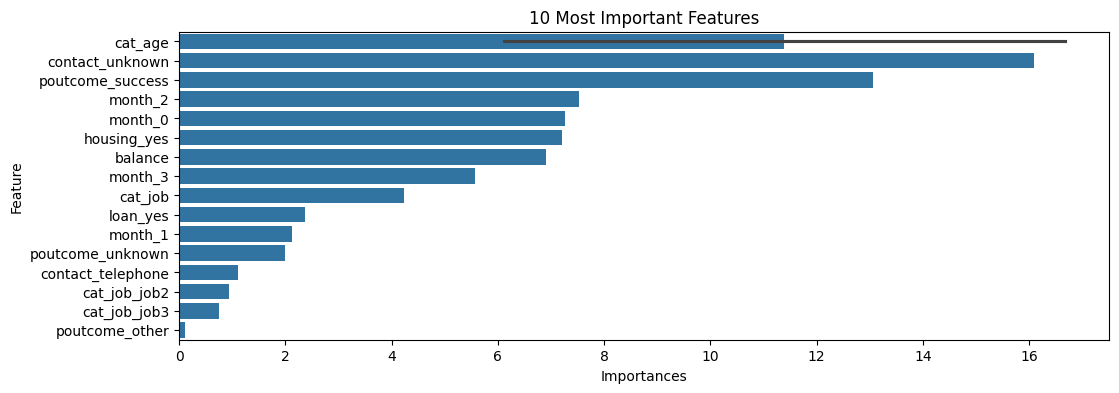

In [ ]:
top_10_features = importance_df

# Buat barplot menggunakan seaborn
plt.figure(figsize=(12, 4))
sns.barplot(data=top_10_features, x='Importance', y='Feature')
plt.title('10 Most Important Features')
plt.xlabel('Importances')
plt.ylabel('Feature')
plt.show()

In [ ]:
data['cat_age'].unique()

array(['Middle-Age', 'Adults', 'Young', 'Old'], dtype=object)

Interpretasi:

- Feature importance dapat menunjukkan seberapa signifikan setiap feature dalam menentukan output model. Dalam konteks ini, nilai tinggi menunjukkan bahwa feature tersebut berkontribusi besar terhadap keputusan model, sehingga didapatkan bahwa:

    - `cat_age` : terdapat dua representasi usia nasabah. fitu dengan nilai tinggi (16.67%) mungkin menunjukan bahwa usia nasabah pada kelompok itu memiliki pengaruh signifikan terhadap kemungin nasabah untuk berinvestai. Usia nasabah dapat mempengaruhi keputusan investasi, misalnya, usia lebih tua mungkin lebih cenderung berinvestasi dalam deposito, karena deposito merupakan instrumen yang lebih aman dan stabil.

    - `contact_unknown` : Jika nasabah pernah dihubungi melalui metode yang tidak diketahui, ini dapat menunjukkan bahwa nasabah mungkin belum mendapat penawaran secara efektif. Bank mungkin perlu menggunakan metode lain untuk menjangkau nasabah ini atau memastikan bahwa nasabah memahami produk deposito dengan lebih baik.

    - `poutcome_success` : jika nasabah telah menunjukan minat dalam transaksi sebelumnya, nasabah mungkin lebih cenderung untuk menjadi potensial untuk investasi deposito.

    - `balance` : Nasabah dengan saldo tinggi cenderung memiliki kapasitas untuk berinvestasi dalam produk deposito. Saldo yang lebih besar bisa menjadi indikator bahwa nasabah memiliki dana yang cukup untuk berinvestasi.
    
    - `month_2`, `month_0`, `month_3`, dan `month_1` dengan varied percentages, memberikan peringatan kepada bank untuk memperhatikan bulan-bulan nasabah lebih aktif atau cenderung melakukan investasi. Hal ini dapat membantu bank dalam merencanakan waktu yang optimal untuk menawarkan produk deposito.

- `poutcome_success` adalah fitur yang paling berpengaruh dari kelompok poutcome, dan sebaliknya, `poutcome_unknown` dan `poutcome_other `memiliki pengaruh yang jauh lebih kecil. Bardasarkan analisa feature vs target di bab sebelumnya, maka akan dipertimbangkan percobaan model dengan drop `poutcome`=='unknown' untuk melihat perbandingan peformanya.

- Sebagai pertimbangan tambahan, akan dilakukan teknik feature engineering SHAP untuk mengoptimalkan feature yang relevan dan mungkin dapat mengembangkan model di evaluasi/ perbaikan selanjutnya.



## **Shapley Value of Explanations (SHAP)**

In [ ]:
import shap
# Ambil transformers dari ColumnTransformer
transformers = final_model.named_steps['transformer']

# Transformasikan data menggunakan transformers
X_transformed = transformers.transform(X_train)

# Siapkan model 
model = final_model.named_steps['model']

# Buat objek explainer SHAP 
explainer = shap.Explainer(model, X_transformed)

# Hitung nilai SHAP
shap_values = explainer(X_transformed)


 97%|=================== | 5959/6132 [00:29<00:00]       

In [ ]:
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# Menghitung rata-rata nilai SHAP untuk setiap fitur
shap_mean = shap_df.abs().mean().sort_values(ascending=False)

# Membuat DataFrame untuk menampilkan nilai SHAP
shap_importance_df = pd.DataFrame({
    'Feature': shap_mean.index,
    'Importance': shap_mean.values})

print("\n10 Most Important Features by SHAP")
shap_importance_df



10 Most Important Features by SHAP


,Feature,Importance
0,balance,0.395391
1,contact_unknown,0.325120
2,cat_age,0.260742
3,cat_age,0.257190
4,cat_job,0.241544
5,housing_yes,0.214688
6,poutcome_success,0.161663
7,month_2,0.088085
8,loan_yes,0.082056
9,month_0,0.082035


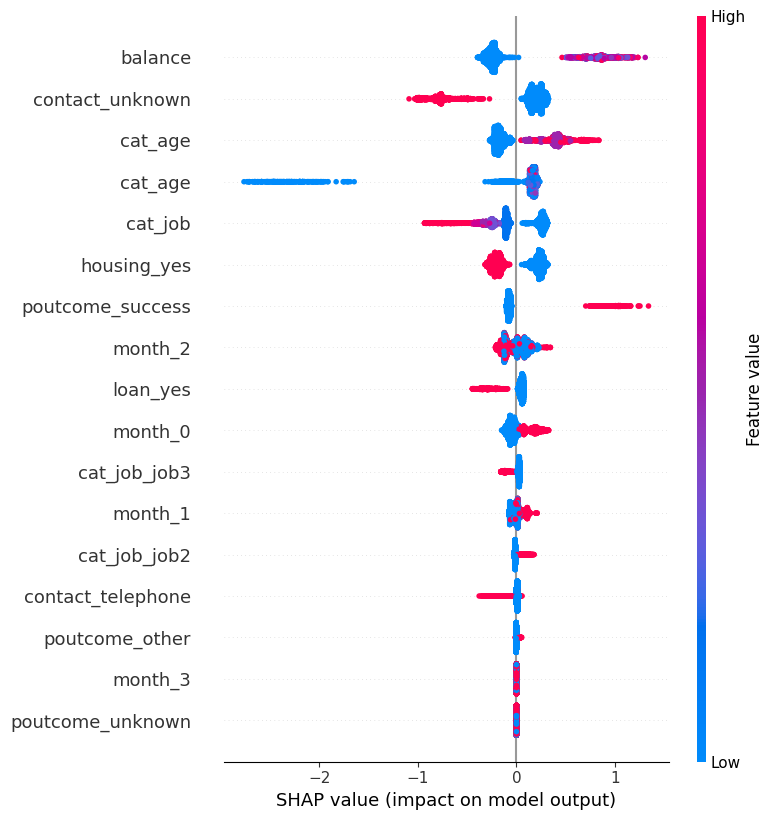

In [ ]:
# Visualisasikan nilai SHAP
plt.figure(figsize=(20, 21))

shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

Interpretasi:

- Berdasarkan SHAP didapatkan bahwa, top feature importancesnya sebagai berikut: 

    - `balance` : sebagai fitur yang paling mempengaruhi model, saldo menunjukkan seberapa banyak dana yang nasabah miliki. Saldo tinggi cenderung mendorong prediksi model ke arah positif. Artinya, nasabah dengan saldo tinggi kemungkinan besar lebih potensial untuk berinvestasi pada psoduk deposito. Hal ini mungkin karena nasabah memiliki kapasitas keuangan yang cukup.
    
    - `contact_unknown` : nilai tinggi pada contact_unknown memiliki pengaruh positif terhadap model, yang menunjukkan bahwa meskipun informasi kontak tidak diketahui, segmen nasabah ini masih memberikan respon positif terhadap penawarn. Artinya, nasabah dengan status kontak yang tidak jelas mungkin belum pernag ditawari campaign sebelumnya, dan menjadi peluang untuk startegi baru yang lebih efektif untuk menawarkan depposito.

    - `cat_age` : terdapat dua kategori `cat_age` yang muncul menunjukkan variasi pengaruh berdasarkan kelompok usia tertentu. Artinya, kelompok usia yang lebih tinggi dalam pengelompokkan ordinal biasanay memiliki kecenderungan untuk produk keuangan yang lebih aman dan terstruktur seperti investasi deposito. Strategi penawaran yang menargetkan kelompok ini mungkin lebih efektif dibandingkan dengan kelompok usia yang lebih muda, yang mungkin lebih tertarik pada investasi beresiko rendah.

    - `cat_job` : kategori pekerjaan (cat_job, cat_job2, cat_job3) muncul dengan pengaruh bervariasi terhadap model. Hal ini menunjukkan bahwa jenis pekerjaan berkontribusi secara signifikan terhadap prediksi apakah nasabah potensial untuk ditawarkan deposito.
    
    - `housing_yes` dan `loan_yes`: nasabah dengan pinjaman atau kepemilikian rumah mungkin lebih memprioritaskan likuiditas, sehingga penawarn deposito perlu disesuaikan dengan skema yang menawarkan bunga kompetitif atau jangka waktu yang lebih fleksibel untuk menarik nasabah. Penawaran yang mengkombinasikan pengelolaaan keuangan yang terintegrasi mungkin lebih menarik bagi segmen ini.

- Berdasarkan SHAP, `poutcome_success` adalah fitur yang paling berpengaruh dari kelompok poutcome, dan sebaliknya, `poutcome_unknown` dan `poutcome_other `memiliki pengaruh yang jauh lebih kecil. Bardasarkan analisa feature vs target di bab sebelumnya, maka akan dilakukan percobaan model dengan drop `poutcome`=='unknown' untuk melihat perbandingan peformanya.

## **Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       815
           1       0.76      0.65      0.70       718

    accuracy                           0.74      1533
   macro avg       0.74      0.74      0.74      1533
weighted avg       0.74      0.74      0.74      1533



Interpretasi:

- Performa kategori 0:

    - Precision :  hal ini menunjukkan ketepatan model dalam memprediksi nasabah yang tidak potensial. Dari semua prediksi yang dikategorikan sebagai kelas 0, 73% adalah benar-benar kelas 0.

    - Recall : model berhasil menangkap 82% dari semua kasus yang nyatanya berada dikelas 0. Hal ini menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi nasabah negatif.

    - F1-score : merupakan nilai rata-rata anatara precision dan recall yang nilainya adalah 77%.

    - Support : jumlah contoh kelas 0 dalam data test adalah 815.

- Performa kategori 1:

    - Precision :  dari semua prediksi yang dikategorikan sebagai kelas 1, 76% benar-benar kelas 1 (nasabah potensial). Ini menunjukkan bahwa model juga cukup baik dalam mengidentifikasi nasabah yang benar-benar melakukan deposito.

    - Recall : model berhasil menangkap 65% dari semua kasus yang nyatanya berada dikelas 1. Hal ini menunjukkan bahwa masih terdapat ruang untuk perbaikan identifikasi nasabah potensial.

    - F1-Score : keseimbangan antara precision dan recall adalah 70%. 

    - Support : jumlah contoh kelas 1 dalam data test adalah 718.

- Secara umum model memiliki performa yang baik dalam mengidentifikasi nasabah yang tidak potensial, namun pada pada recall kelas 1 (65%) menunjukkan bahwa ada resiko kehilangan beberapa nasabah yang sebenarnya potensial karena model tidak dapat mengidentifikasinya. 

- Dengan akurasi 74% serta avg macro dan weighted sekitar 74%, model menunjukkan performa yang cukup baik, namun masih terdapat ruang untuk perbaikan, terutama dalam meningkatkan recall untuk kelas positif.

- Untuk meningkatkan F1-score pada model, kita dapat melakukan penyesuaian threshold klasifikasi. Hal ini dapat membantu menemukan titik optimal recall untuk kelas positif tanpa mengorbankan precision secara signifikan. Selin itu kita juga dapat melakuakn ekplorasi terhadap fitur baru yang dapat meningkatkan kemampuan model. Mencaoba model alternatif lainnya, serta teknik ensemble juga mungkin dapat meningkatkan deteksi kelas positif. Terakhir, hyperpatameter yang mendalam penting untuk mengoptimalkan kinerja mode, terutam dalam meningkatkan recall dan precision yang berdampak langsung pada F1-score. 

## **Predict Probability vs Actual**

In [ ]:
y_proba = final_model.predict_proba(X_test)[:,1]

In [ ]:
df_proba = pd.DataFrame(y_test)
df_proba['probability'] = y_proba

In [ ]:
def probability_range(x):
    if x < 0.1:
        probability_range = '0.0 - 0.1'
    elif 0.1 <= x < 0.2:
        probability_range = '0.1 - 0.2'
    elif 0.2 <= x < 0.3:
        probability_range = '0.2 - 0.3'
    elif 0.3 <= x < 0.4:
        probability_range = '0.3 - 0.4'
    elif 0.4 <= x < 0.5:
        probability_range = '0.4 - 0.5'
    elif 0.5 <= x < 0.6:
        probability_range = '0.5 - 0.6'
    elif 0.6 <= x < 0.7:
        probability_range = '0.6 - 0.7'
    elif 0.7 <= x < 0.8:
        probability_range = '0.7 - 0.8'
    elif 0.8 <= x < 0.9:
        probability_range = '0.8 - 0.9'
    else:
        probability_range = '0.9 - 1.0'
        
    return probability_range

df_proba.insert(1, 'probability range',value ='')

df_proba['probability range'] = df_proba['probability'].apply(probability_range)

In [ ]:
df_probability = df_proba.groupby(['probability range', 'deposit']).size().unstack().reset_index()
df_probability['total'] = df_probability[1]+df_probability[0]
df_probability['actual probability'] = (df_probability[1]/df_probability['total']).round(2)
df_probability['predicted probability'] = df_proba.groupby(['probability range'])['probability'].mean().values.round(2)
df_probability = df_probability.sort_values(by='probability range', ascending=False)
df_probability = df_probability.rename(columns = {0:'no', 1:'yes'})
df_probability

deposit,probability range,no,yes,total,actual probability,predicted probability
9,0.9 - 1.0,5.0,91.0,96.0,0.95,0.93
8,0.8 - 0.9,19.0,97.0,116.0,0.84,0.85
7,0.7 - 0.8,20.0,91.0,111.0,0.82,0.76
6,0.6 - 0.7,35.0,104.0,139.0,0.75,0.65
5,0.5 - 0.6,66.0,83.0,149.0,0.56,0.55
4,0.4 - 0.5,126.0,100.0,226.0,0.44,0.45
3,0.3 - 0.4,179.0,67.0,246.0,0.27,0.35
2,0.2 - 0.3,200.0,67.0,267.0,0.25,0.25
1,0.1 - 0.2,95.0,18.0,113.0,0.16,0.17
0,0.0 - 0.1,70.0,NaN,NaN,NaN,0.03


- deposit : probabilitas nasabah untuk investasi pada deposito.

- probability : rentang nilai probabilitas prediksi.

- no : jumlah nasabah yang tidak investasi deposito dalam rentang probabilitas tersebut.

- yes : jumlah nasabah yang melakukan deposito dalam rentang probabilitas tersebut.

- total : Jumlah nasabah yang berada dalam rentang probabilitas tersebut.

- actual probability : probabilitas aktual terjadinya deposito dalam rentang tersebut.

- predicted probability : probabilitas yang diprediksi oleh model dalam rentang tersebut.

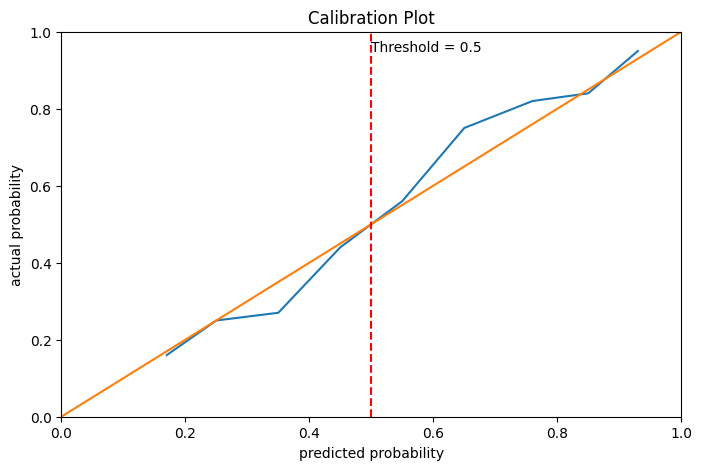

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_probability.sort_values(by='probability range', ascending=True), x='predicted probability', y='actual probability')
value = [x/100 for x in range(0,110,10)]
sns.lineplot(x=value, y=value)
plt.xlim(0,1)
plt.ylim(0,1)
plt.axvline(0.5, color='r', linestyle='--')
plt.annotate('Threshold = 0.5', (0.5,0.95))
plt.title('Calibration Plot')
plt.show()

Interpretasi:

- Model cenderung memberikan probabilitas tinggi yang mendekati probabilitas aktual di rentang tinggi, tetapi kurnag akurat di rentang rendah.

- Untuk rentang probabilitas rendah, model dapat ditingkatkan untuk mengurangi kesalahan prediksi, yang mungkin melibatkan penyesuaian threshold dan peningkatan fitur yang digunakan oleh model.

## **Confusion Matrix**

<Axes: >

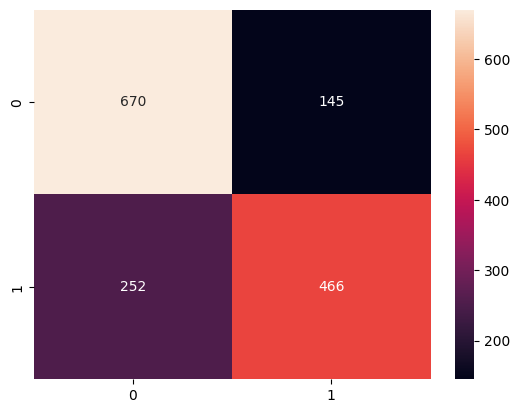

In [ ]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

Interpretasi:

- True Positives (Jumlah nasabah yang benar-benar potensial yang berhasil di identifikasi dengan benar oleh model) = 466 
- True Negatives (Jumlah nasabah yang benar-benar tidak potensial yang berhasil di identifikasi dengan benar oleh model) = 670
- False Positives (Jumlah nasabah yang salah diklasifikasikan sebagai calon nasabah potensial padahal sebenarnya tidak) = 145
- False Negatives ( Jumlah nasabah yang potensial tetapi gagal diidentifikasi oleh model, yang dapat mengakibatkan kehilangan peluang investasi) = 252

## **Cost Benefit Analysis**

Untuk melakukan analisa cost benefit berdasarkan confusion matrix dan informasi keuangan yang dipaparkan pada bab 1, akan dilakukan perhitungan kerugiand dari FP dan FN serta keuntungan dari TP.

- Menghitung kerugian FP 

    - Jumlah FP = 145

    - Biaya telemarketing per nasabah = Rp 35.349,9/nasabah

    - Total biaya FP= Jumlah FP x biaya telemarketing per nasabah = 145 x Rp 35.349,9 ≈ Rp 5.134.708,5

- Menghitung kerugian dari FN

    - Jumlah FN = 252

    - Keuntungan per nasabah = Rp 69.333/nasabah

    - Total kerugian FN = Jumlah FN x keuntungan per nasabah = 252 x  Rp 69.333 ≈ Rp 17.477.916

- Menghitung keuntungan dari TP

    - Jumlah TP = 466

    - Keuntungan per nasabah = Rp 69.333/nasabah
    
    - Total keuntungan TP = Jumlah TP x keuntungan per nasabah = 466 x  Rp 69.333 ≈ Rp 32.276.438

- Ringkasan biaya-manfaat

    - Total biaya FP ≈ Rp 5.134.708,5

    - Total kerugian FN ≈ Rp 17.477.916

    - Total keuntungan TP ≈ Rp 32.276.438

- Net Benefit 

    - Net Benefit = Total keuntungan TP - (Total biaya FP-Total kerugian FN ) ≈ Rp 9.663.813,5

    - Net Benefit menunjukkan bahwa meskipun terdapat kerugian dari kesalahan dalam identifikasi nasabah potensial dan biaya untuk telemarketing yang tidak efektif. 

- Perbandingan

    - Tanpa machine learning, bisa saja telemarketer menelpon semua nasabah, yang pada skema ini berjumlah 1533. Jika hal itu terjadi, maka Total Biaya Marketing yang dikeluarkan adalah :

        - Total biaya FP= Jumlah Total Nasabah x biaya telemarketing per nasabah = 1533 x Rp 35.349,9 ≈ Rp 54.186.135,7

    - Sedangkan ketika kita sudah tahu nasabah mana yang potensial, yang akan kita telpon jika dan hanya terindikasi sebagai nasabah potensial, maka:

        - Total biaya FP= Jumlah FP x biaya telemarketing per nasabah = 145 x Rp 35.349,9 ≈ Rp 5.134.708,5
    
    - Dari perhitungan diatas didapatkan penghematan biaya Telemarketing sebesar ≈ 49.051.427,2
    
    - Sehingga diadapatkan bahwa **Efektivitas Pengurangan Biaya (Persentase Penghematan)** adalah : **90.5 %**


## **Modeling Lanjutan**

- Modeling ini merupakan hasil dari perpanjangan analisa feature vs target dan feature importance, dimana ['poutcome'] == 'unknown' menjadi feature yang tingkat kepentingannya tidak teratas. Sehingga, akan dilakukan pemodelan lanjutan. 

- Pada experiment modeling kali ini, akan melibatkan filter data tambahan yaitu, data tanpa (data['balance']<0)&(data['deposit']==1) dan (data['poutcome'] == 'unknown'). Hal ini dilakukan untuk menunjukkan pada Bank bahwa data yang lebih valid atau yang sudah pernah mendapatkan hasil pada campaign sebelumnya, mungkin dapat menggambarkan potensi nasabah untuk target campaign selanjutnya.

- Pada analisa sebelumnya yang tertuang didapatkan bahwa (data['poutcome'] == 'unknown') merupakan feature yang tidak terlalu penting jika dilihat dari nilai kepentingannya, baik pada feature importance maupun analisa shap.

- Jika hal ini dilakukan, maka kasus klasifikasi pada modeling ini akan imbalance. Sehingga akan dilakukan pemodelan sesuai dengan data imbalance dan melihat hasilnya.

- Dilakukan eksperimen model benchamark pada data tanpa (data['balance']<0)&(data['deposit']==1) dan (data['poutcome'] == 'unknown') untuk ketiga skenario yang ada (dapat dilihat di filet model_lanjutan.ipynb), dari percobaan tersebut didapatkan bahwa skenario 3 yang menunjukkan peforma terbaik. Sehingga skenario tiga jugalah yang akan kita analisa lebih lanjut.

![alt text](model_lanjutan_benchmark.jpg)

[model_lanjutan_benchmark](https://drive.google.com/file/d/1eedRUBfHpkwxJ3mr_-Ob8PN1kEGbwIzR/view?usp=drive_link)

Berdasarkan tabel tersebut, didapatkan bahwa peforma model paling baik berada di skenario 3 dengan model XGBClassifier dan RandomForestClassifier. Oleh karena itu, selanjutnya akan dilakukan tuning utuk kedua model tersebut.

### **Hyperparameter Tuning**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

Hasil hyperparameter tuning 

| F1 Score | Train Set | Test Set |
| --- | --- | --- |
| XGBoost Before Tuning | 0,822 | 0,835 |
| XGBoost After Tuning | 0,842 | 0,829 |
| RandomForest Before Tuning | 0,834 | 0,831 |
| RandomForest After Tuning | 0,848 | 0,841 |

Interpretasi :

- XGBoost: Sebelum tuning, model XGBoost memiliki f1-score yang cukup baik pada train set dan test set, dan sedikit lebih tinggi pada test set, yang menunjukkan peforma yang cukup baik. Setelah tuning, F1-score pada train set meningkat, menunjukkan model menjadi lebih baik dalam mencocokan data pelatihan. Namun, skor pada set pengujian sedikit menurun. Hal ini mungkin menunjukkan bahwa tuning meningkatkan peforma pada data pelatihan tapi tidak berhasil meningkatkan data test. Hal ini dapat disebabkan oleh randomsearch yang memang mencari kombinasi secara random dan optimal dalam waktu.

- RandomForest: Sebelum tuning, model RandomForest menunjukkan f1-score yang cukup seimbang antara data train dan data test, yang menunjukkan bahwa model ini memiliki kemampuan generalisasi yang baik. Setelah tuning, model RandomForest menunjukkan bahwa peningkatan f-1 score yang signifikan pada kedua set data. Skor pada set train dan test meningkat, yang menunjukkan bahwa tuning berhasil meningkatkan peforma model secara keseluruha.

- Model RandomForest menjadi model yang dipertimbangkan untuk digunakan pada model ini sebagai model utama.

### **Model Evaluation**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

![alt text](model_lanjutan_random_search.best_estimator_.jpg)

[model_lanjutan_random_search.best_estimator_](https://drive.google.com/file/d/1g0KVnOBUhhdZVcDrMmgiq0emOqmnCbFE/view?usp=drive_link)

### **Learning Curve**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

![alt text](model_lanjutan_learning_curves.jpg)

[model_lanjutan_learning_curves](https://drive.google.com/file/d/1HIxaRixFQCXLhrtmNOhCx6WMPrLxiGEk/view?usp=drive_link)

Interpretasi :

- Training score menunjukkan bahwa modell semakin baik dengan lebih banyak data train. Kenaikan training score menunjukkan bahwa model lebih mampu menagkap pola dalam data training saat dataset bertambah besar. Setelah mencapai ukuran pelatihan lebih dari kira-kira 900, penambahan ukuran training score tidak meningkat secara signifikan, yang dapat menandakan bahwa model mungkin sudah mempelajari sebagian besar informasi yang tersedia dari data train.

- Peningkatan konsistensi dalam score validasi menunjukkan bahwa model juga semakin baik dalam generalisasi pada data yang tidak terlihat selama training. Dari visualisasi tidak ada indikasi overfitting yang jelas karena score validasi terus meningkat seiring bertambahnya train set. Hal ini dapat menjadi tanda bahwa model dapat terus meningkatkan kemampuannya dalamm memprediksi data yang belum ada sebelumnya.

- Model menunjukkan peforma yang baik dalam hal generalisasi pada data validasi. Ukuran training yang lebih besar menunjukkan bahwa model masih mendapatkan peningkatan peforma dari bertambahnya data. 

### **Feature Importances**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

![alt text](model_lanjutan_feature_important.jpg)

[model_lanjutan_feature_important](https://drive.google.com/file/d/1QPAM-mzaK0TeyZZOckxvhGGMyZuI6ydi/view?usp=drive_link)

Interpretasi :

- `poutcome_success` : menunjukkan bahwa hasil campaign sebelumnya (success) sangat mempengaruhi keputusan untuk melakukan deposito. Jika nasabah sudah menunjukkan hasil sukses pada kampanye sebelumnya, nasabah lebih cenderung melakukan deposito. 

- `housing_yes` : menunjukkan bahwa kepemilikan rumah juga merupakan feature penting. Nasabah yang memiliki rumah lebih ccenderung untuk melakukan investasi deposito, mungkin karena nasabah memang meiliki stabilitas finansial yang lebih baik.

- `pdays` : jumlah hari sejak nasabah terakhir dihubungi mempengaruhi keputusan deposito. Hal ini mungkin menunjukkan keterhubungan antara waktu kontak terakhir dan minat nasabah terhadap deposito.

- `balance` : saldo rekening nasabah memiliki pengaruh yang cukup signifikan, tetapi tidak sebesar feature utama lainnya. Nasabah dengan saldo lebih tinggi mungkin lebih cenderung untuk berinvestasi dalam deposito.

- `loan_yes` : memiliki pinjaman mempengaruhi keputusan deposito, namun dengan pengaruh yang relatif kecil dibandung feature utama lainnya. Nasabah dengan pinjaman mungkin memiliki lebih sedikit dana yang tersedia untuk deposito.

### **Classification Report**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

![alt text](model_lanjutan_classification_report.jpg)

[model_lanjutan_classification_report](https://drive.google.com/file/d/1shvhnmbwpviw4rww2GlsonSV85SWOl7A/view?usp=drive_link)

Interpretasi :

- Model menunjukkan peforma yang baik dalam mendetekdi kelas positif dengan precision, recall, dan f1 score yang tinggi, tapi kurang efektif dalam mendeteksi kelas negatif dengan nilai-nilai yang lebih rendah.

- Untuk meningkatkan peforma pada kelas 0, kita mungkin dapat mengevaluasi dengan teknik imbalance secara lebih dalam lagi.

### **PR-Curve**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

![alt text](model_lanjutan_pr_curves.jpg)

[model_lanjutan_pr_curves](https://drive.google.com/file/d/1DKdvtAE_EGF1uRBUJvUcbCK0s0MBTbBi/view?usp=drive_link)

Interpretasi:

- Nilai Threshold=0.38004239440673826 merupakan batas dimana model dapat mencapai keseimbangan optimal antara precision dan recall. Hal ini berarti bahwa jika kita menetapkan threshold untuk memutuskan kelas positif pada nilai ini, model akan memberikan kombinasi terbaik dari precision dan recall.

- Dengan nilai threshold ini, kinerja model dapat dioptiomalkan berdasarkan tujuan yang spesifik. Jadi, jika kita ingin memaksimalkan f1-score, threshold ini merupakan titik yang ideal.

### **Predict Probability vs Actual**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

![alt text](model_lanjutan_predict_probability_vs_actual.jpg)

[model_lanjutan_predict_probability_vs_actual](https://drive.google.com/file/d/1DwLnG7gE9khRYwD_eFbxh9UhfbyvpF5f/view?usp=drive_link)

Interpretasi: 

- Model sangat efektif falam mendeteksi kasus positif pada rentang probabilitas yang lelbih tinggi. Ketepatan dan akurasi sangat baik pada rentang ini.

- Akurasi dan ketepatan prediksi menurun dengan penurunan probabilitas. Model kurang efektif dalam memprediksi hasil untuk rentang probabilitas yang lebih rendah.

- Mengumpulkan lebih banyak data pada rentang probabilitas rendah dapat membantu memprebaiki akurasi dan ketepatan model pada area tersebut.

### **Confusion Matrix**

**(proses coding dapat dilihat pada file model_lanjutan.ipynb)**

![alt text](model_lanjutan_confusion_matrix.jpg)

[model_lanjutan_confusion_matrix](https://drive.google.com/file/d/1SXCbOMBrO53I-du1LuStGlCFpoCVxCGy/view?usp=drive_link)

Interpretasi:

- True Positives (Jumlah nasabah yang benar-benar potensial yang berhasil di identifikasi dengan benar oleh model) = 225

- True Negatives (Jumlah nasabah yang benar-benar tidak potensial yang berhasil di identifikasi dengan benar oleh model) = 83

- False Positives (Jumlah nasabah yang salah diklasifikasikan sebagai calon nasabah potensial padahal sebenarnya tidak) = 44

- False Negatives ( Jumlah nasabah yang potensial tetapi gagal diidentifikasi oleh model, yang dapat mengakibatkan kehilangan peluang investasi) = 41

### **Cost Benefit Analysis**

- Menghitung kerugian FP 

    - Jumlah FP = 44

    - Biaya telemarketing per nasabah = Rp 35.349,9/nasabah

    - Total biaya FP= Jumlah FP x biaya telemarketing per nasabah = 44 x Rp 35.349,9 ≈ Rp 1.553.596,6

- Menghitung kerugian dari FN

    - Jumlah FN = 41

    - Keuntungan per nasabah = Rp 69.333/nasabah

    - Total kerugian FN = Jumlah FN x keuntungan per nasabah = 41 x  Rp 69.333 ≈ Rp 2.844.633

- Menghitung keuntungan dari TP

    - Jumlah TP = 225

    - Keuntungan per nasabah = Rp 69.333/nasabah
    
    - Total keuntungan TP = Jumlah TP x keuntungan per nasabah = 225 x  Rp 69.333 ≈ Rp 15.622.425

- Ringkasan biaya-manfaat

    - Total biaya FP ≈ Rp 1.553.596,6

    - Total kerugian FN ≈ Rp 2.844.633

    - Total keuntungan TP ≈ Rp 15.622.425

- Net Benefit 

    - Net Benefit = Total keuntungan TP - (Total biaya FP-Total kerugian FN ) ≈ Rp 11.224.195,4

- Kesimpulan

    - Net Benefit dari model ini adalah sekitar Rp 11.224.195,4. Hal ini menunjukkan bahwa meskipun biaya yang terkait dengan false positives dan kerugian dari false negatives, keuntungan dari true postive lebih besar dari total biaya tersebut, yang dapat menghasilkan manfaat bersih positif.

# **6. Kesimpulan dan Rekomendasi**


**Kesimpulan Model 1:**

- F1-Score dangan CatBoostClassifier menunjukkan peforma 70% untuk kategori nasabah potensial.

- Learning Curves : stabil dengan bertambahnya data, meskipun ada indikasi overfitting pada data yang lebih sedikit.

- Feature importance : `balance`, `contact_unknown`, `cat_age` merupakan fitur-fitur berpengaruh.

- Fitur poutcome_unknown harus diperhatikan dan dapat memerlukan perbaikan lebih lanjut

- Confusion Matrix:

    - TP : 466, TN: 670, FP : 145, FN : 252

    - Net Benefit : Rp. 9.663.813,5

    - Penghematan : 90.5%

**Rekomendasi Model 1:**

- Untuk modeling berikutnya mungkin dapat dilakukan perbaikan di kategori potensial, mungkin melalui penyesuaian threshold ataupun hypertuning lebih dalam lagi, apabila memungkinkan gunakan GridSearch.

- Untuk Bank, dibutuhkan perbaikan value dalam input data. Pastikan data akurat, dengan mewarning pengisian 'unknown' atau 'other'. Inputan yang valid akan menghasilkan model machine yang pasti akan lebih baik.

- Dari model 1 kita sudah dapat mendeteksi nasabah-nasabah mana yang potensial, sehingga Bank dapat memanfaatkan data tersebut untuk menawarkan produk deposito dengan lebih tepat sasaran.


**Kesimpulan Model 2:**
- F1-Score dangan RandomForest menunjukkan peforma 82% untuk kategori nasabah potensial, yang menunjukkan peforma sangat baik setelah menghapus `poutcome` dengan value 'unknown'.

- Learning Curves : stabil dengan bertambahnya data, tanpa indikasi overfitting.

- Penanganan data imbalance: Menangani data tidak seimbang dengan cukup baik, namun mungkin membutuhkan teknik tambahan yang dapat meningkatkan deteksi kelas negatif.

- Feature importance : `poutcome_success`, `housing_yes`, `pdays`, dan `balance` merupakan fitur-fitur berpengaruh.

- Confusion Matrix:

    - TP : 225, TN: 83, FP : 44, FN : 41

    - Net Benefit : Rp. 11.224.195,4

    - Penghematan : 88.8%

- Model 2 menunjukkan bahwa data yang lebih valid, dapat menghasilkan peforma yang lebih baik. Sehingga memang penting untuk menggunakan data yang valid walaupun jumlah data minim.

**Rekomendasi Model 2:**

- Penanganan data imbalance: explorasi kembali teknink-teknik handling data imbalance agar peforma jadi lebih baik.

- Tingkatkan akurasi pada rentang probabilitas rendah, mungkin dengan cara menambahkan data valid dan menyesuaikan threshold untuk hasil yang lebih baik.

- Untuk Bank, optimalkan kampanye telemarketing kepada nasabah yang sudah terdeteksi potensial dan sesuaikan penawaran berdasarkan domain knowledge yang tepat sasaran pada target.

**Perbandingan Model 1 vs Model 2:**

- Model 1 menunjukkan peforma baik dengan penghematan biaya yang tinggi, namun memiliki ruang untuk perbaikan pada deteksi nasabah potensial dan pengelolaan data. Jika Bank ingin fokus pada penghematan biaya maksimal dan model stabil, serta mentolelir inputan 'unknown' pada `poutcome`, maka model 1 merupakan model yang lebih tepat dibandingkan model 2.

- Model 2 menunjukkna peforma yang sangat baik setelah penghapusan `poutcome` dengan value 'unknown' dan penanganan data imbalance yang cukup baik. Meskipun efisiensinya dalam penghematan lebih rendah dibandiingkan model 1, model ini tetap memberikan hasil yang solid dan memerlukan penyesuaian lebih lanjut untuk akurasi probabilitas rendah. Jika Bank ingin beranjak pada maturity leval data yang lebih baik dengan tidak mentolelir inputan 'unknown' pada `poutcome` untuk mendeteksi nasabah potensial deposito, maka model 2 merupakan model yang lebih tepat dibandingkan model 1.

- Penggunaan Model 1 dan Model 2 akan menjadi tepat jika didasari pada priritas yang lebih spesifik, kebutuhan bisnis dari Bank, serta kemampuan teknologi yang ada yang dapat dilihat dari parameter biaya dan waktu. 

**Rekomendasi untuk Bank:**

- Investasi dalam pengumpulan dan pengelolaan daya mungkin dapat menjadi alternatif untuk meningkatkan kualitas data, sehingga secara tidak langsung dapat meningkatkan akurasi model.

- Bank dapat menambahkan feature-feature informasi nasabah terkait kepentingan deposito. Hal ini dibuktikan oleh [sumber](https://colab.research.google.com/drive/1ezBwEtMX5I4L_01MGYezRvuvGkEad4pW?usp=share_link#scrollTo=yyUy-p3mptGR), dimana pemodelan machine untuk mendeketsi nasabah potensial investasi dapat mencapai diatas 90% dengan feature-feature tambahan terkait nasabah dan data marketing.